In [1]:
import os
import psycopg2
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

minusten = pd.read_csv('/Users/gus/Documents/Personal/Flooding_GBR/GBRminus10meters_flooding.csv', header=None)
basecase = pd.read_csv('/Users/gus/Documents/Personal/Flooding_GBR/GBRactual_flooding.csv')


minusten.columns = ['ka', 'km2', 'perc']

basecase.columns = ['ka', 'sealevel', 'km2', 'perc']
basecase

minusten['sealevel'] = (-9.6654*minusten.ka)+65.6930

minusten = minusten[['ka', 'sealevel', 'km2', 'perc']]

minusten

minusten.set_index('sealevel')

newvalues = pd.DataFrame(basecase.sealevel[0:27])

newvalues.set_index('sealevel')

newvalues

mix = pd.concat([newvalues, minusten]).sort_values('sealevel')

mix

mix.set_index('sealevel', inplace=True)

mix.interpolate(method='slinear', inplace=True)

minustenres = mix[mix.index%5 == 0]

minustenres.reset_index(inplace=True)

minustenres.iloc[0,:] = [-130,20.246756,0,0]

minustenres

--------------

basecase = basecase[['sealevel', 'ka', 'km2', 'perc']]
basecase = basecase.iloc[:27,:]

basecase

minustenres.to_csv('/Users/gus/OneDrive - CitySprint (UK) Ltd/Personal/Flooding_GBR/GBRminusten.csv')
basecase.to_csv('/Users/gus/OneDrive - CitySprint (UK) Ltd/Personal/Flooding_GBR/GBRbasecase.csv')

--------

---------

### input a sea level curve (sl vs time)

In [2]:
#sea_level_curve = pd.read_csv('/Users/gus/OneDrive - CitySprint (UK) Ltd/Personal/Flooding_GBR/notebook/yokoyama_example_test.csv')
sea_level_curve = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/lambeck_etal_2014.xlsx')


In [3]:
sea_level_curve.head()

,time (ka),nominal esl (m),best estimate esl (m),2 sigma error esl
0,0.000,0.00,0.00,0.00
1,0.122,-0.21,-0.16,0.07
2,0.192,-0.21,-0.16,0.07
3,0.296,-0.21,-0.16,0.07
4,0.365,-0.21,-0.16,0.07


In [4]:
sea_level_curve.shape

(326, 4)

In [5]:
sea_level_curve.columns = ['age', 'nominal esl (m)', 'sealevel', '2 sigma error esl']

### input the IODP Exp 325 data points for comparison

In [6]:
sea_level_325_hydro = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/Exp325_RSL_Yokoyama_etal_2018_hydro.xlsx')
sea_level_325_hydro = pd.DataFrame(sea_level_325_hydro)
sea_level_325_hydro.head(10)

,Age (ka),Max RSL (mbsl),Age (ka).1,Min RSL (mbsl)
0,25.561853,113.22423,25.564880,83.169165
1,23.551641,108.25329,25.412295,82.519119
2,22.901014,106.72377,25.376393,84.239829
3,22.093340,106.87672,25.277662,83.245641
4,20.711319,128.82533,25.066737,83.666259
5,20.338891,127.02814,24.932103,82.289691
6,20.047231,125.65158,24.694251,82.289691
7,19.742110,124.12206,23.724892,80.568981
8,19.073535,121.52187,23.617185,97.967268
9,17.938303,117.65983,23.500503,97.814316


In [7]:
sea_level_325_nog = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/Exp325_RSL_Yokoyama_etal_2018_nog.xlsx')
sea_level_325_nog = pd.DataFrame(sea_level_325_nog)
sea_level_325_nog.head(10)

,Age (ka),Max RSL (mbsl),Age (ka).1,Min RSL (mbsl)
0,27.570915,109.24748,27.557452,98.464362
1,27.342038,109.24748,27.359990,98.961456
2,26.197656,108.97981,26.610531,97.011318
3,25.708488,107.67972,26.184193,98.732028
4,24.792982,107.67972,25.816195,98.464362
5,24.016597,104.42949,25.726440,97.814316
6,23.603722,104.42949,25.376393,97.164270
7,22.701679,103.39706,24.887226,96.781890
8,22.351633,103.39706,24.792982,97.814316
9,21.849002,103.39706,24.474350,97.431936


### input the old Lambeck and Chappell 2001 curve for comparison

In [8]:
sea_level_lambeck2001 = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/lambeck_etal_2001.xlsx')

In [9]:
sea_level_lambeck2001.head()

,age_ka,sl_m
0,40,74.50
1,39,74.00
2,38,69.50
3,37,64.50
4,36,70.25


### now reformat a bit and plot

In [10]:
sea_level_curve.loc[:, 'sealevel'] = sea_level_curve.sealevel

In [11]:
sea_level_curve.shape

(326, 4)

In [12]:
sea_level_curve = sea_level_curve[sea_level_curve.age < 24]

In [13]:
sea_level_curve.shape

(261, 4)

In [14]:
# calculate the gradient and keep only the values that increase. only increases in 

In [15]:
sea_level_curve.head()

,age,nominal esl (m),sealevel,2 sigma error esl
0,0.000,0.00,0.00,0.00
1,0.122,-0.21,-0.16,0.07
2,0.192,-0.21,-0.16,0.07
3,0.296,-0.21,-0.16,0.07
4,0.365,-0.21,-0.16,0.07


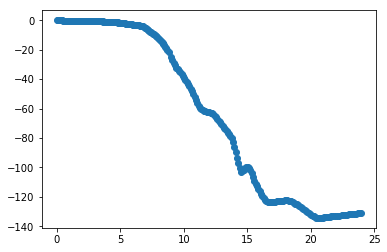

In [16]:
plt.scatter(sea_level_curve.age, sea_level_curve.sealevel)

In [17]:
sea_level_curve.head()

,age,nominal esl (m),sealevel,2 sigma error esl
0,0.000,0.00,0.00,0.00
1,0.122,-0.21,-0.16,0.07
2,0.192,-0.21,-0.16,0.07
3,0.296,-0.21,-0.16,0.07
4,0.365,-0.21,-0.16,0.07


In [18]:
sea_level_curve.set_index('age', inplace=True)

In [19]:
np.linspace(6,24,73)

array([  6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,  24.  ])

In [20]:
sea_level_curve.index

Float64Index([   0.0,  0.122,  0.192,  0.296,  0.365,  0.435,  0.504,  0.574,
               0.643,  0.712,
              ...
              22.697, 22.836, 22.974, 23.113, 23.252, 23.391,  23.53, 23.669,
              23.808, 23.947],
             dtype='float64', name='age', length=261)

In [21]:
sea_level_curve.sealevel.values

array([   0.  ,   -0.16,   -0.16,   -0.16,   -0.16,   -0.16,   -0.17,
         -0.17,   -0.17,   -0.18,   -0.18,   -0.19,   -0.19,   -0.2 ,
         -0.2 ,   -0.2 ,   -0.21,   -0.21,   -0.22,   -0.22,   -0.23,
         -0.23,   -0.24,   -0.24,   -0.24,   -0.25,   -0.25,   -0.26,
         -0.26,   -0.27,   -0.27,   -0.27,   -0.28,   -0.29,   -0.32,
         -0.35,   -0.38,   -0.41,   -0.44,   -0.47,   -0.51,   -0.54,
         -0.57,   -0.6 ,   -0.63,   -0.67,   -0.7 ,   -0.73,   -0.76,
         -0.8 ,   -0.83,   -0.86,   -0.89,   -0.93,   -0.96,   -0.99,
         -1.02,   -1.06,   -1.09,   -1.12,   -1.15,   -1.19,   -1.22,
         -1.25,   -1.28,   -1.32,   -1.36,   -1.43,   -1.52,   -1.6 ,
         -1.69,   -1.77,   -1.86,   -1.94,   -2.03,   -2.11,   -2.2 ,
         -2.28,   -2.37,   -2.45,   -2.54,   -2.62,   -2.71,   -2.79,
         -2.88,   -2.96,   -3.05,   -3.13,   -3.22,   -3.3 ,   -3.39,
         -3.47,   -3.56,   -3.64,   -3.73,   -3.81,   -4.01,   -4.46,
         -4.93,   -5

In [22]:
from scipy import interpolate
x = sea_level_curve.index.values
y = sea_level_curve.sealevel.values
f = interpolate.interp1d(x,y, fill_value='extrapolate')

In [23]:
x

array([  0.   ,   0.122,   0.192,   0.296,   0.365,   0.435,   0.504,
         0.574,   0.643,   0.712,   0.782,   0.851,   0.921,   0.99 ,
         1.06 ,   1.129,   1.199,   1.268,   1.372,   1.442,   1.511,
         1.581,   1.65 ,   1.72 ,   1.789,   1.859,   1.928,   1.997,
         2.067,   2.136,   2.206,   2.275,   2.345,   2.414,   2.484,
         2.553,   2.623,   2.692,   2.762,   2.831,   2.901,   2.97 ,
         3.039,   3.109,   3.178,   3.248,   3.317,   3.387,   3.456,
         3.526,   3.595,   3.665,   3.734,   3.803,   3.873,   3.942,
         4.012,   4.081,   4.151,   4.22 ,   4.29 ,   4.359,   4.429,
         4.498,   4.568,   4.637,   4.707,   4.776,   4.845,   4.915,
         4.984,   5.054,   5.123,   5.193,   5.262,   5.332,   5.401,
         5.47 ,   5.54 ,   5.609,   5.679,   5.748,   5.818,   5.887,
         5.957,   6.026,   6.096,   6.165,   6.235,   6.304,   6.373,
         6.443,   6.512,   6.582,   6.651,   6.721,   6.79 ,   6.86 ,
         6.929,   6.

In [24]:
y

array([   0.  ,   -0.16,   -0.16,   -0.16,   -0.16,   -0.16,   -0.17,
         -0.17,   -0.17,   -0.18,   -0.18,   -0.19,   -0.19,   -0.2 ,
         -0.2 ,   -0.2 ,   -0.21,   -0.21,   -0.22,   -0.22,   -0.23,
         -0.23,   -0.24,   -0.24,   -0.24,   -0.25,   -0.25,   -0.26,
         -0.26,   -0.27,   -0.27,   -0.27,   -0.28,   -0.29,   -0.32,
         -0.35,   -0.38,   -0.41,   -0.44,   -0.47,   -0.51,   -0.54,
         -0.57,   -0.6 ,   -0.63,   -0.67,   -0.7 ,   -0.73,   -0.76,
         -0.8 ,   -0.83,   -0.86,   -0.89,   -0.93,   -0.96,   -0.99,
         -1.02,   -1.06,   -1.09,   -1.12,   -1.15,   -1.19,   -1.22,
         -1.25,   -1.28,   -1.32,   -1.36,   -1.43,   -1.52,   -1.6 ,
         -1.69,   -1.77,   -1.86,   -1.94,   -2.03,   -2.11,   -2.2 ,
         -2.28,   -2.37,   -2.45,   -2.54,   -2.62,   -2.71,   -2.79,
         -2.88,   -2.96,   -3.05,   -3.13,   -3.22,   -3.3 ,   -3.39,
         -3.47,   -3.56,   -3.64,   -3.73,   -3.81,   -4.01,   -4.46,
         -4.93,   -5

In [25]:
np.linspace(24,7,681)
#np.linspace(-130,0,27)

array([ 24.   ,  23.975,  23.95 ,  23.925,  23.9  ,  23.875,  23.85 ,
        23.825,  23.8  ,  23.775,  23.75 ,  23.725,  23.7  ,  23.675,
        23.65 ,  23.625,  23.6  ,  23.575,  23.55 ,  23.525,  23.5  ,
        23.475,  23.45 ,  23.425,  23.4  ,  23.375,  23.35 ,  23.325,
        23.3  ,  23.275,  23.25 ,  23.225,  23.2  ,  23.175,  23.15 ,
        23.125,  23.1  ,  23.075,  23.05 ,  23.025,  23.   ,  22.975,
        22.95 ,  22.925,  22.9  ,  22.875,  22.85 ,  22.825,  22.8  ,
        22.775,  22.75 ,  22.725,  22.7  ,  22.675,  22.65 ,  22.625,
        22.6  ,  22.575,  22.55 ,  22.525,  22.5  ,  22.475,  22.45 ,
        22.425,  22.4  ,  22.375,  22.35 ,  22.325,  22.3  ,  22.275,
        22.25 ,  22.225,  22.2  ,  22.175,  22.15 ,  22.125,  22.1  ,
        22.075,  22.05 ,  22.025,  22.   ,  21.975,  21.95 ,  21.925,
        21.9  ,  21.875,  21.85 ,  21.825,  21.8  ,  21.775,  21.75 ,
        21.725,  21.7  ,  21.675,  21.65 ,  21.625,  21.6  ,  21.575,
        21.55 ,  21.

In [26]:
xnew = np.linspace(24,7,681)
ynew = f(xnew)

In [27]:
age = pd.Series(xnew)
sl = pd.Series(ynew)
resamp_sealevel = pd.DataFrame({'age':age, 'sl':sl}).set_index('age')

In [28]:
resamp_sealevel.loc[:, 'resampsl'] = pd.rolling_mean(resamp_sealevel.sl, 50, center=True)

/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=True).mean()
  """Entry point for launching an IPython kernel.


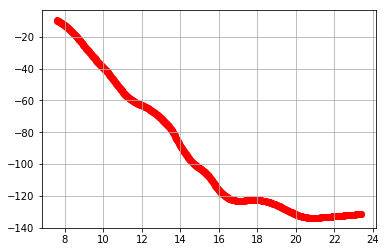

In [29]:
plt.scatter(resamp_sealevel.index, resamp_sealevel.resampsl, c='r')
#plt.scatter(x, y)
plt.grid()


In [30]:
def get_age_from_sealevel(input_sealevel, search_window):
    '''input sea level as negative integer'''
    desiredsl = input_sealevel
    mask1 = resamp_sealevel.sl < (desiredsl+search_window)
    mask2 = resamp_sealevel.sl > (desiredsl-search_window)
    output_age = resamp_sealevel[mask1 & mask2].index.values
    return output_age


In [31]:
get_age_from_sealevel(-10,0.3)

array([ 7.725,  7.7  ,  7.675,  7.65 ])

In [32]:
# possible approach, resample to multiples of 5 m before resampling the others

In [33]:
# input all the sea levels that are used in the study

In [34]:
sl_study = np.linspace(-130, 0, 27)
ages_study = []
for s in sl_study:
    l = get_age_from_sealevel(s, 0.4)
    if s:
        l = np.max(l)
    else:
        l = 6.
    ages_study.append(l)
    print((l,s))
    

(19.75, -130.0)
(18.925000000000001, -125.0)
(16.25, -120.0)
(15.9, -115.0)
(15.6, -110.0)
(15.375, -105.0)
(15.125, -100.0)
(14.225, -95.0)
(14.1, -90.0)
(13.949999999999999, -85.0)
(13.774999999999999, -80.0)
(13.35, -75.0)
(12.899999999999999, -70.0)
(12.475, -65.0)
(11.35, -60.0)
(11.024999999999999, -55.0)
(10.75, -50.0)
(10.449999999999999, -45.0)
(10.1, -40.0)
(9.6999999999999993, -35.0)
(9.2749999999999986, -30.0)
(9.0, -25.0)
(8.6999999999999993, -20.0)
(8.2999999999999989, -15.0)
(7.7249999999999979, -10.0)
(7.0, -5.0)
(6.0, 0.0)


In [196]:
sl_study_min = np.linspace(-130, 0, 27)
ages_study_min = []
for s in sl_study_min:
    l = get_age_from_sealevel(s, 0.4)
    if s:
        l = np.min(l)
    else:
        l = 6.
    ages_study_min.append(l)
    print((l,s))

(19.649999999999999, -130.0)
(18.800000000000001, -125.0)
(16.199999999999999, -120.0)
(15.875, -115.0)
(15.574999999999999, -110.0)
(15.375, -105.0)
(14.375, -100.0)
(14.225, -95.0)
(14.1, -90.0)
(13.949999999999999, -85.0)
(13.75, -80.0)
(13.324999999999999, -75.0)
(12.875, -70.0)
(12.424999999999999, -65.0)
(11.274999999999999, -60.0)
(11.0, -55.0)
(10.75, -50.0)
(10.424999999999999, -45.0)
(10.049999999999999, -40.0)
(9.6499999999999986, -35.0)
(9.25, -30.0)
(8.9749999999999996, -25.0)
(8.6749999999999989, -20.0)
(8.2749999999999986, -15.0)
(7.6499999999999986, -10.0)
(7.0, -5.0)
(6.0, 0.0)


In [35]:
# return a dataframe with both, sea level and age

In [197]:
sea_level_resamp_min = pd.DataFrame(columns=['sealevel', 'age'])
sea_level_resamp_min.loc[:, 'sealevel'] = sl_study_min
sea_level_resamp_min.loc[:, 'age'] = ages_study_min
sea_level_resamp_min.set_value(26, 'age', 6.0)

,sealevel,age
0,-130.0,19.650
1,-125.0,18.800
2,-120.0,16.200
3,-115.0,15.875
4,-110.0,15.575
5,-105.0,15.375
6,-100.0,14.375
7,-95.0,14.225
8,-90.0,14.100
9,-85.0,13.950


In [36]:
sea_level_resamp = pd.DataFrame(columns=['sealevel', 'age'])
sea_level_resamp.loc[:, 'sealevel'] = sl_study
sea_level_resamp.loc[:, 'age'] = ages_study
sea_level_resamp.set_value(26, 'age', 6.0)

,sealevel,age
0,-130.0,19.750
1,-125.0,18.925
2,-120.0,16.250
3,-115.0,15.900
4,-110.0,15.600
5,-105.0,15.375
6,-100.0,15.125
7,-95.0,14.225
8,-90.0,14.100
9,-85.0,13.950


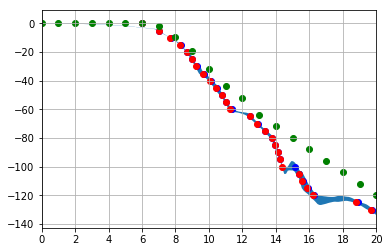

In [353]:
#plt.scatter(sea_level_325_hydro['Age (ka)'], -1*(sea_level_325_hydro['Max RSL (mbsl)']), c='m', alpha=0.3, marker='v')
#plt.scatter(sea_level_325_hydro['Age (ka).1'], -1*(sea_level_325_hydro['Min RSL (mbsl)']), c='m', alpha=0.3, marker='v')
#plt.scatter(sea_level_325_hydro['Age (ka)'], -1*(sea_level_325_hydro['Max RSL (mbsl)']), c='k', alpha=0.3, marker='v')
#plt.scatter(sea_level_325_nog['Age (ka).1'], -1*(sea_level_325_nog['Min RSL (mbsl)']), c='k', alpha=0.3, marker='v')
#plt.scatter(resamp_sealevel.index, resamp_sealevel.resampsl, c='r')
plt.fill_between(sea_level_curve.index, sea_level_curve.sealevel-sea_level_curve['2 sigma error esl'],
                sea_level_curve.sealevel+sea_level_curve['2 sigma error esl'])

plt.scatter(sea_level_resamp.age,sea_level_resamp.sealevel, c='b')
plt.scatter(sea_level_resamp_min.age,sea_level_resamp_min.sealevel, c='r')

plt.scatter(sea_level_lambeck2001.age_ka, -1*(sea_level_lambeck2001.sl_m), c='g')
#plt.scatter(sea_level_curve.index, sea_level_curve['nominal esl (m)'])
#sea_level_curve.columns = ['age', 'nominal esl (m)', 'sealevel', '2 sigma error esl']
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])

plt.xlim(0, 20)
plt.grid()

In [352]:
(get_age_from_sealevel(-12, 0.4))

array([ 8.   ,  7.975,  7.95 ,  7.925])

(-0.1, 0.1)

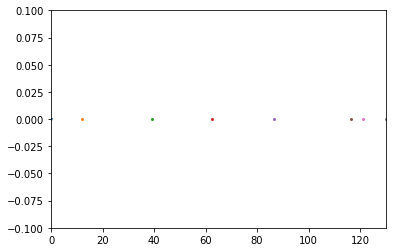

In [360]:
size=4

plt.scatter(0,0, marker='v', s=size) # 6

plt.scatter(12.1,0, s=size) # 8

plt.scatter(39.0,0, s=size) # 10

plt.scatter(62.6,0, s=size) # 12

plt.scatter(86.5,0, s=size) # 14
    
plt.scatter(116.5,0, s=size) # 16
        
plt.scatter(121.,0, s=size) # 18

plt.scatter(130,0, s=size) # 20

plt.xlim(0,130)
plt.ylim(-0.1,0.1)

# Figure 3, sub-regions summary
load the dataset


## summary

In [38]:
flooding_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/GBR_flooding_summary_by_sub-region.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [39]:
flooding_summary.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,coastline length (km),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,coastline change (km per 5 m of sea-level rise),...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,"shelf-edge bathymetry subset, flooding rate (km2 per 5 m of sea-level rise)",Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,indicative age (between 20 and 6.5 ka BP),sea level,NaN,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,ALL GBR,...,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR
1,20.2468,-130,NaN,3021.34,391.987,829.586,831.862,412.092,552.694,0,...,0,0,0,0,0,0,0,0,0,0
2,19.7294,-125,NaN,2944.36,325.359,745.163,846.178,411.66,552.255,-76.977,...,5.63425,1.52226,0.645326,1.68008,879.015,232.481,699.272,25.4819,3.11331,27.3723
3,19.2121,-120,NaN,2961.04,280.839,749.661,854.529,413.316,552.006,16.6763,...,9.92217,3.0279,1.26499,3.414,712.054,102.869,532.178,25.2037,2.98949,28.2495
4,18.6948,-115,NaN,3078.94,278.802,857.678,851.638,416.177,552.539,117.905,...,13.9368,4.67982,1.84661,5.14431,692.754,59.1688,498.255,27.6525,2.80598,28.1906


In [40]:
sealevels = flooding_summary.iloc[1:,1].values

## coastline length

In [41]:
coastline_length = flooding_summary.iloc[0:,3:9]
coastline_length.columns = coastline_length.iloc[0,:]
coastline_length = coastline_length.iloc[1:,:]
coastline_length.loc[:, 'sl'] = sealevels

In [42]:
for col in coastline_length.columns:
    coastline_length[col] = coastline_length[col].astype('float')

In [43]:
coastline_length

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl
1,3021.337085,391.987245,829.586222,831.861658,412.092205,552.693711,-130.0
2,2944.360067,325.358551,745.162554,846.178289,411.660004,552.254672,-125.0
3,2961.036400,280.838976,749.660975,854.528936,413.316324,552.005946,-120.0
4,3078.941673,278.801721,857.677730,851.637724,416.177257,552.539413,-115.0
5,3288.591433,276.641297,1046.942405,867.485850,418.618089,546.405883,-110.0
6,3198.358727,284.543159,930.550144,696.149666,420.736254,542.954403,-105.0
7,3593.146751,297.646747,1295.385567,921.631028,422.247138,543.409965,-100.0
8,3706.907105,282.821641,1318.673108,1020.433809,423.490896,544.369624,-95.0
9,4150.704590,283.109090,1616.859723,1182.255050,432.280883,541.951241,-90.0
10,4805.460601,284.157108,1958.433980,1487.516842,456.348626,540.673333,-85.0


## coastline change

In [44]:
coastline_change = flooding_summary.iloc[0:,9:15]
coastline_change.columns = coastline_change.iloc[0,:]
coastline_change = coastline_change.iloc[1:,:]
coastline_change.loc[:, 'sl'] = sealevels

In [45]:
for col in coastline_change.columns:
    coastline_change[col] = coastline_change[col].astype('float')

In [46]:
coastline_change

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-130.0
2,-76.977018,-66.628694,-84.423668,14.316630,-0.432201,-0.439040,-125.0
3,16.676333,-44.519574,4.498421,8.350647,1.656321,-0.248726,-120.0
4,117.905273,-2.037255,108.016755,-2.891211,2.860933,0.533467,-115.0
5,209.649760,-2.160424,189.264675,15.848125,2.440832,-6.133530,-110.0
6,-90.232706,7.901862,-116.392260,-171.336184,2.118165,-3.451480,-105.0
7,394.788024,13.103588,364.835422,225.481362,1.510884,0.455562,-100.0
8,113.760354,-14.825106,23.287542,98.802781,1.243759,0.959658,-95.0
9,443.797485,0.287449,298.186615,161.821241,8.789986,-2.418382,-90.0
10,654.756011,1.048018,341.574257,305.261792,24.067744,-1.277908,-85.0


## flooding area percentage

In [47]:
flooded_area_perc = flooding_summary.iloc[0:,16:22]
flooded_area_perc.columns = flooded_area_perc.iloc[0,:]
flooded_area_perc = flooded_area_perc.iloc[1:,:]
flooded_area_perc.loc[:, 'sl'] = sealevels

In [48]:
for col in flooded_area_perc.columns:
    flooded_area_perc[col] = flooded_area_perc[col].astype('float')

In [49]:
flooded_area_perc

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-130.0
2,0.362729,0.926503,0.783596,0.192164,0.101051,0.092592,-125.0
3,0.659158,1.336465,1.379949,0.382253,0.198318,0.188151,-120.0
4,0.941424,1.572269,1.939243,0.591046,0.289869,0.283511,-115.0
5,1.275495,1.797940,2.627423,0.807990,0.381245,0.373586,-110.0
6,1.891821,2.008408,3.931279,1.169749,0.477555,0.468430,-105.0
7,2.602883,2.259396,5.536063,1.534329,0.584954,0.558352,-100.0
8,3.339072,2.523000,7.189941,1.891569,0.697455,0.650401,-95.0
9,4.095545,2.796834,8.843554,2.310318,0.819120,0.747365,-90.0
10,5.208643,3.051251,11.365907,2.873516,0.964722,0.846864,-85.0


## flooding rate

In [50]:
flooding_rate = flooding_summary.iloc[0:,22:28]
flooding_rate.columns = flooding_rate.iloc[0,:]
flooding_rate = flooding_rate.iloc[1:,:]
flooding_rate.loc[:, 'sl'] = sealevels

In [51]:
for col in flooding_rate.columns:
    flooding_rate[col] = flooding_rate[col].astype('float')

In [52]:
flooding_rate.iloc[0] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,-130.0]

In [53]:
flooding_rate.loc[:, 'age'] = sea_level_resamp.age.values

In [54]:
flooding_rate.loc[:, 'time_diff'] = sea_level_resamp.age.diff().shift()

#### fixing the dataframe to get the rate (per unit of time) 

In [55]:
flooding_rate.set_value(27, 'time_diff', -1)

flooding_rate.loc[:, 'ALL_GBR_time'] = -flooding_rate['ALL GBR'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'ALL_GBR_time', -flooding_rate.loc[27,'ALL GBR'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'southern_GBR_time'] = -flooding_rate['southern GBR'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'southern_GBR_time', -flooding_rate.loc[27,'southern GBR'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'southern-central_GBR_time'] = -flooding_rate['southern-central GBR'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'southern-central_GBR_time', -flooding_rate.loc[27,'southern-central GBR'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'northern-central_GBR_time'] = -flooding_rate['northern-central GBR'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'northern-central_GBR_time', -flooding_rate.loc[27,'northern-central GBR'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'northern_GBR_time'] = -flooding_rate['northern GBR'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'northern_GBR_time', -flooding_rate.loc[27,'northern GBR'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'Capricorn_channel_time'] = -flooding_rate['Capricorn channel'] / flooding_rate.time_diff
flooding_rate.set_value(27, 'Capricorn_channel_time', -flooding_rate.loc[27,'Capricorn channel'] / flooding_rate.loc[27,'time_diff'])
########
flooding_rate.loc[:, 'age_corr'] = flooding_rate.age + (-flooding_rate.time_diff/2)


In [56]:
flooding_rate

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl,age,time_diff,ALL_GBR_time,southern_GBR_time,southern-central_GBR_time,northern-central_GBR_time,northern_GBR_time,Capricorn_channel_time,age_corr
1,NaN,NaN,NaN,NaN,NaN,NaN,-130.0,19.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,886.104267,232.481482,699.272373,178.629203,22.021067,27.372266,-125.0,18.925,-0.825,1074.065778,281.795735,216.520247,26.692202,33.178504,847.602876,19.3375
3,724.142578,102.869209,532.178320,176.699435,21.196309,28.249534,-120.0,16.250,-2.675,270.707506,38.455779,66.055863,7.923854,10.560573,198.945166,17.5875
4,689.542914,59.168780,499.106756,194.087303,19.950804,28.190562,-115.0,15.900,-0.350,1970.122611,169.053658,554.535152,57.002297,80.544464,1426.019304,16.0750
5,816.096917,56.626204,614.124371,201.663309,19.912668,26.628279,-110.0,15.600,-0.300,2720.323057,188.754012,672.211031,66.375559,88.760932,2047.081236,15.7500
6,1505.615161,52.811503,1163.545815,336.277923,20.988023,28.037955,-105.0,15.375,-0.225,6691.622936,234.717791,1494.568546,93.280102,124.613134,5171.314733,15.4875
7,1737.041974,62.978753,1432.090954,338.901164,23.404405,26.582958,-100.0,15.125,-0.250,6948.167894,251.915012,1355.604656,93.617622,106.331831,5728.363814,15.2500
8,1798.424206,66.144551,1475.900730,332.077619,24.516201,27.211718,-95.0,14.225,-0.900,1998.249118,73.493946,368.975133,27.240223,30.235242,1639.889700,14.6750
9,1847.977385,68.711320,1475.665027,389.254430,26.513284,28.664774,-90.0,14.100,-0.125,14783.819083,549.690560,3114.035437,212.106274,229.318195,11805.320214,14.1625
10,2719.169558,63.839272,2250.918914,523.528708,31.729509,29.414311,-85.0,13.950,-0.150,18127.797054,425.595147,3490.191385,211.530063,196.095410,15006.126094,14.0250


In [57]:
sum(flooding_rate.ALL_GBR_time.values[1:])

660575.90572139947

In [58]:
sum(flooding_rate['ALL GBR'].values[1:])

244288.47286983664

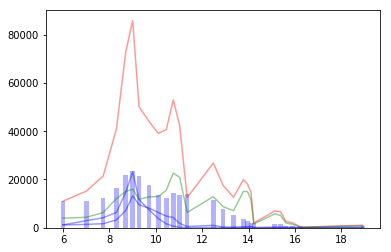

In [59]:
plt.bar(flooding_rate.age, flooding_rate['ALL GBR'], color='b', alpha=0.3, width=0.2)
plt.plot(flooding_rate.age, flooding_rate['ALL_GBR_time'], color='r', alpha=0.4)
plt.plot(flooding_rate.age, flooding_rate['southern_GBR_time'], color='b', alpha=0.4)
plt.plot(flooding_rate.age, flooding_rate['northern_GBR_time'], color='b', alpha=0.4)
plt.plot(flooding_rate.age, flooding_rate['Capricorn_channel_time'], color='g', alpha=0.4)



## shelf-edge; flooding percentage

In [60]:
shelf_edge_flooding = flooding_summary.iloc[0:,30:36]
shelf_edge_flooding.columns = shelf_edge_flooding.iloc[0,:]
shelf_edge_flooding = shelf_edge_flooding.iloc[1:,:]
shelf_edge_flooding.loc[:, 'sl'] = sealevels

In [61]:
for col in shelf_edge_flooding.columns:
    shelf_edge_flooding[col] = shelf_edge_flooding[col].astype('float')

In [62]:
shelf_edge_flooding

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-130.0
2,2.977350,5.426713,5.634247,1.522256,0.645326,1.680079,-125.0
3,5.389178,7.827944,9.922167,3.027895,1.264986,3.414004,-120.0
4,7.735635,9.209094,13.936757,4.679822,1.846608,5.144309,-115.0
5,10.377190,10.530895,18.563834,6.393672,2.425235,6.778723,-110.0
6,13.902515,11.763651,24.206237,9.242270,3.033910,8.499661,-105.0
7,17.436662,13.233736,30.156389,12.091308,3.715127,10.131293,-100.0
8,20.781409,14.777719,35.644109,14.824384,4.420823,11.801518,-95.0
9,24.166239,16.381617,40.972707,17.867150,5.180104,13.560930,-90.0
10,27.551930,17.871789,46.167403,21.445564,6.029060,15.366347,-85.0


## shelf-edge; flooding rate

In [63]:
shelf_edge_flooding_rate = flooding_summary.iloc[0:,36:42]
shelf_edge_flooding_rate.columns = shelf_edge_flooding_rate.iloc[0,:]
shelf_edge_flooding_rate = shelf_edge_flooding_rate.iloc[1:,:]
shelf_edge_flooding_rate.loc[:, 'sl'] = sealevels

In [64]:
for col in shelf_edge_flooding_rate.columns:
    shelf_edge_flooding_rate[col] = shelf_edge_flooding_rate[col].astype('float')

In [65]:
shelf_edge_flooding_rate.iloc[0] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,-130.0]

In [66]:
shelf_edge_flooding_rate.loc[:, 'age'] = sea_level_resamp.age.values

In [67]:
shelf_edge_flooding_rate.loc[:, 'time_diff'] = sea_level_resamp.age.diff().shift()

In [68]:
shelf_edge_flooding_rate.set_value(27, 'time_diff', -1)

shelf_edge_flooding_rate.loc[:, 'ALL_GBR_time'] = -shelf_edge_flooding_rate['ALL GBR'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'ALL_GBR_time', -shelf_edge_flooding_rate.loc[27,'ALL GBR'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'southern_GBR_time'] = -shelf_edge_flooding_rate['southern GBR'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'southern_GBR_time', -shelf_edge_flooding_rate.loc[27,'southern GBR'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'southern-central_GBR_time'] = -shelf_edge_flooding_rate['southern-central GBR'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'southern-central_GBR_time', -shelf_edge_flooding_rate.loc[27,'southern-central GBR'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'northern-central_GBR_time'] = -shelf_edge_flooding_rate['northern-central GBR'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'northern-central_GBR_time', -shelf_edge_flooding_rate.loc[27,'northern-central GBR'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'northern_GBR_time'] = -shelf_edge_flooding_rate['northern GBR'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'northern_GBR_time', -shelf_edge_flooding_rate.loc[27,'northern GBR'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'Capricorn_channel_time'] = -shelf_edge_flooding_rate['Capricorn channel'] / shelf_edge_flooding_rate.time_diff
shelf_edge_flooding_rate.set_value(27, 'Capricorn_channel_time', -shelf_edge_flooding_rate.loc[27,'Capricorn channel'] / shelf_edge_flooding_rate.loc[27,'time_diff'])
########
shelf_edge_flooding_rate.loc[:, 'age_corr'] = shelf_edge_flooding_rate.age + (-shelf_edge_flooding_rate.time_diff/2)


In [69]:
shelf_edge_flooding_rate

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl,age,time_diff,ALL_GBR_time,southern_GBR_time,southern-central_GBR_time,northern-central_GBR_time,northern_GBR_time,Capricorn_channel_time,age_corr
1,NaN,NaN,NaN,NaN,NaN,NaN,-130.0,19.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,879.014557,232.481477,699.272364,25.481904,3.113312,27.372264,-125.0,18.925,-0.825,1065.472190,281.795729,30.887156,3.773711,33.178502,847.602865,19.3375
3,712.053593,102.869225,532.178327,25.203739,2.989487,28.249534,-120.0,16.250,-2.675,266.188259,38.455785,9.421958,1.117565,10.560574,198.945169,17.5875
4,692.753533,59.168767,498.255048,27.652522,2.805977,28.190565,-115.0,15.900,-0.350,1979.295809,169.053619,79.007204,8.017076,80.544472,1423.585851,16.0750
5,779.876611,56.626212,574.271378,28.689103,2.791524,26.628277,-110.0,15.600,-0.300,2599.588703,188.754042,95.630342,9.305079,88.760922,1914.237928,15.7500
6,1040.795501,52.811509,700.284570,47.684287,2.936491,28.037958,-105.0,15.375,-0.225,4625.757781,234.717817,211.930163,13.051072,124.613144,3112.375864,15.4875
7,1043.399833,62.978750,738.479706,47.691646,3.286464,26.582958,-100.0,15.125,-0.250,4173.599332,251.915001,190.766585,13.145854,106.331833,2953.918822,15.2500
8,987.482889,66.144551,681.086770,45.750496,3.404557,27.211716,-95.0,14.225,-0.900,1097.203209,73.493946,50.833885,3.782841,30.235240,756.763078,14.6750
9,999.316395,68.711327,661.337920,50.934558,3.663077,28.664774,-90.0,14.100,-0.125,7994.531159,549.690617,407.476466,29.304618,229.318190,5290.703360,14.1625
10,999.570674,63.839269,644.719201,59.901087,4.095701,29.414315,-85.0,13.950,-0.150,6663.804495,425.595125,399.340577,27.304671,196.095430,4298.128009,14.0250


In [70]:
flooded_area_perc.dtypes

0
ALL GBR                 float64
southern GBR            float64
Capricorn channel       float64
southern-central GBR    float64
northern-central GBR    float64
northern GBR            float64
sl                      float64
dtype: object

In [71]:
sea_level_resamp.age

0     19.750
1     18.925
2     16.250
3     15.900
4     15.600
5     15.375
6     15.125
7     14.225
8     14.100
9     13.950
10    13.775
11    13.350
12    12.900
13    12.475
14    11.350
15    11.025
16    10.750
17    10.450
18    10.100
19     9.700
20     9.275
21     9.000
22     8.700
23     8.300
24     7.725
25     7.000
26     6.000
Name: age, dtype: float64

In [72]:
flooded_area_perc

,ALL GBR,southern GBR,Capricorn channel,southern-central GBR,northern-central GBR,northern GBR,sl
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-130.0
2,0.362729,0.926503,0.783596,0.192164,0.101051,0.092592,-125.0
3,0.659158,1.336465,1.379949,0.382253,0.198318,0.188151,-120.0
4,0.941424,1.572269,1.939243,0.591046,0.289869,0.283511,-115.0
5,1.275495,1.797940,2.627423,0.807990,0.381245,0.373586,-110.0
6,1.891821,2.008408,3.931279,1.169749,0.477555,0.468430,-105.0
7,2.602883,2.259396,5.536063,1.534329,0.584954,0.558352,-100.0
8,3.339072,2.523000,7.189941,1.891569,0.697455,0.650401,-95.0
9,4.095545,2.796834,8.843554,2.310318,0.819120,0.747365,-90.0
10,5.208643,3.051251,11.365907,2.873516,0.964722,0.846864,-85.0


In [73]:
sea_level_325_hydro.columns

Index(['Age (ka)', 'Max RSL (mbsl)', 'Age (ka).1', 'Min RSL (mbsl)'], dtype='object')

In [74]:
sea_level_325_nog

,Age (ka),Max RSL (mbsl),Age (ka).1,Min RSL (mbsl)
0,27.570915,109.247480,27.557452,98.464362
1,27.342038,109.247480,27.359990,98.961456
2,26.197656,108.979810,26.610531,97.011318
3,25.708488,107.679720,26.184193,98.732028
4,24.792982,107.679720,25.816195,98.464362
5,24.016597,104.429490,25.726440,97.814316
6,23.603722,104.429490,25.376393,97.164270
7,22.701679,103.397060,24.887226,96.781890
8,22.351633,103.397060,24.792982,97.814316
9,21.849002,103.397060,24.474350,97.431936


In [75]:
sea_level_curve.diff()

,nominal esl (m),sealevel,2 sigma error esl
age,,,
0.000,NaN,NaN,NaN
0.122,-0.21,-0.16,0.07
0.192,0.00,0.00,0.00
0.296,0.00,0.00,0.00
0.365,0.00,0.00,0.00
0.435,0.00,0.00,0.00
0.504,0.00,-0.01,0.00
0.574,0.00,0.00,0.00
0.643,0.00,0.00,0.00


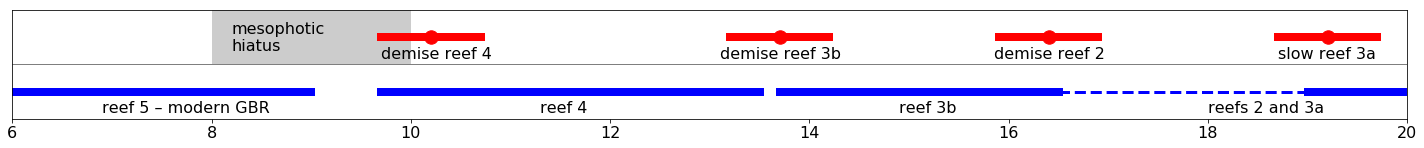

In [263]:
fig = plt.figure(figsize=(25,2))

ax = plt.subplot(111)
plt.plot([6, 20], [0.5, 0.5], c='k', linewidth=0.5)
# demise
## slowing of 3a
plt.plot([19.7, 18.7], [0.75, 0.75], c='r', linewidth=8)
plt.scatter(19.2, 0.75, c='r', s=180)
plt.text(18.7, 0.56, 'slow reef 3a', fontsize=16)
## death of 2 and start of 3b
plt.plot([15.9, 16.9], [0.75, 0.75], c='r', linewidth=8)
plt.scatter(16.4, 0.75, c='r', s=180)
plt.text(15.85, 0.56, 'demise reef 2', fontsize=16)
## death of 3b
plt.plot([13.2, 14.2], [0.75, 0.75], c='r', linewidth=8)
plt.scatter(13.7, 0.75, c='r', s=180)
plt.text(13.1, 0.56, 'demise reef 3b', fontsize=16)
## demise of 4
plt.plot([9.7, 10.7], [0.75, 0.75], c='r', linewidth=8)
plt.scatter(10.2, 0.75, c='r', s=180)
plt.text(9.7, 0.56, 'demise reef 4', fontsize=16)
## mesophotic hiatus
hiatus = patches.Rectangle((8,0.5),2,8,linewidth=1,edgecolor=None,facecolor='k', alpha=0.2)
ax.add_patch(hiatus)
plt.text(8.2, 0.63, 'mesophotic\nhiatus', fontsize=16)


# growth
## 3A
plt.plot([20, 19], [0.25, 0.25], c='b', linewidth=8)
plt.plot([19, 16], [0.25, 0.25], '--', c='b', linewidth=3)
plt.text(18, 0.06, 'reefs 2 and 3a', fontsize=16)

## 3b
plt.plot([16.5, 13.7], [0.25, 0.25], c='b', linewidth=8)
plt.text(14.9, 0.06, 'reef 3b', fontsize=16)

# 4 13 - 10
plt.plot([13.5, 9.7], [0.25, 0.25], c='b', linewidth=8)
plt.text(11.3, 0.06, 'reef 4', fontsize=16)

# 5
plt.plot([9, 6], [0.25, 0.25], c='b', linewidth=8)
plt.text(6.9, 0.06, 'reef 5 – modern GBR', fontsize=16)

plt.yticks([])
plt.xticks(fontsize=16)


plt.xlim(6, 20)
plt.ylim(0,1)

plt.savefig('./figures_review/figure_reef-response_review.svg')
plt.savefig('./figures_review/figure_reef-response_review.pdf')

plt.show()

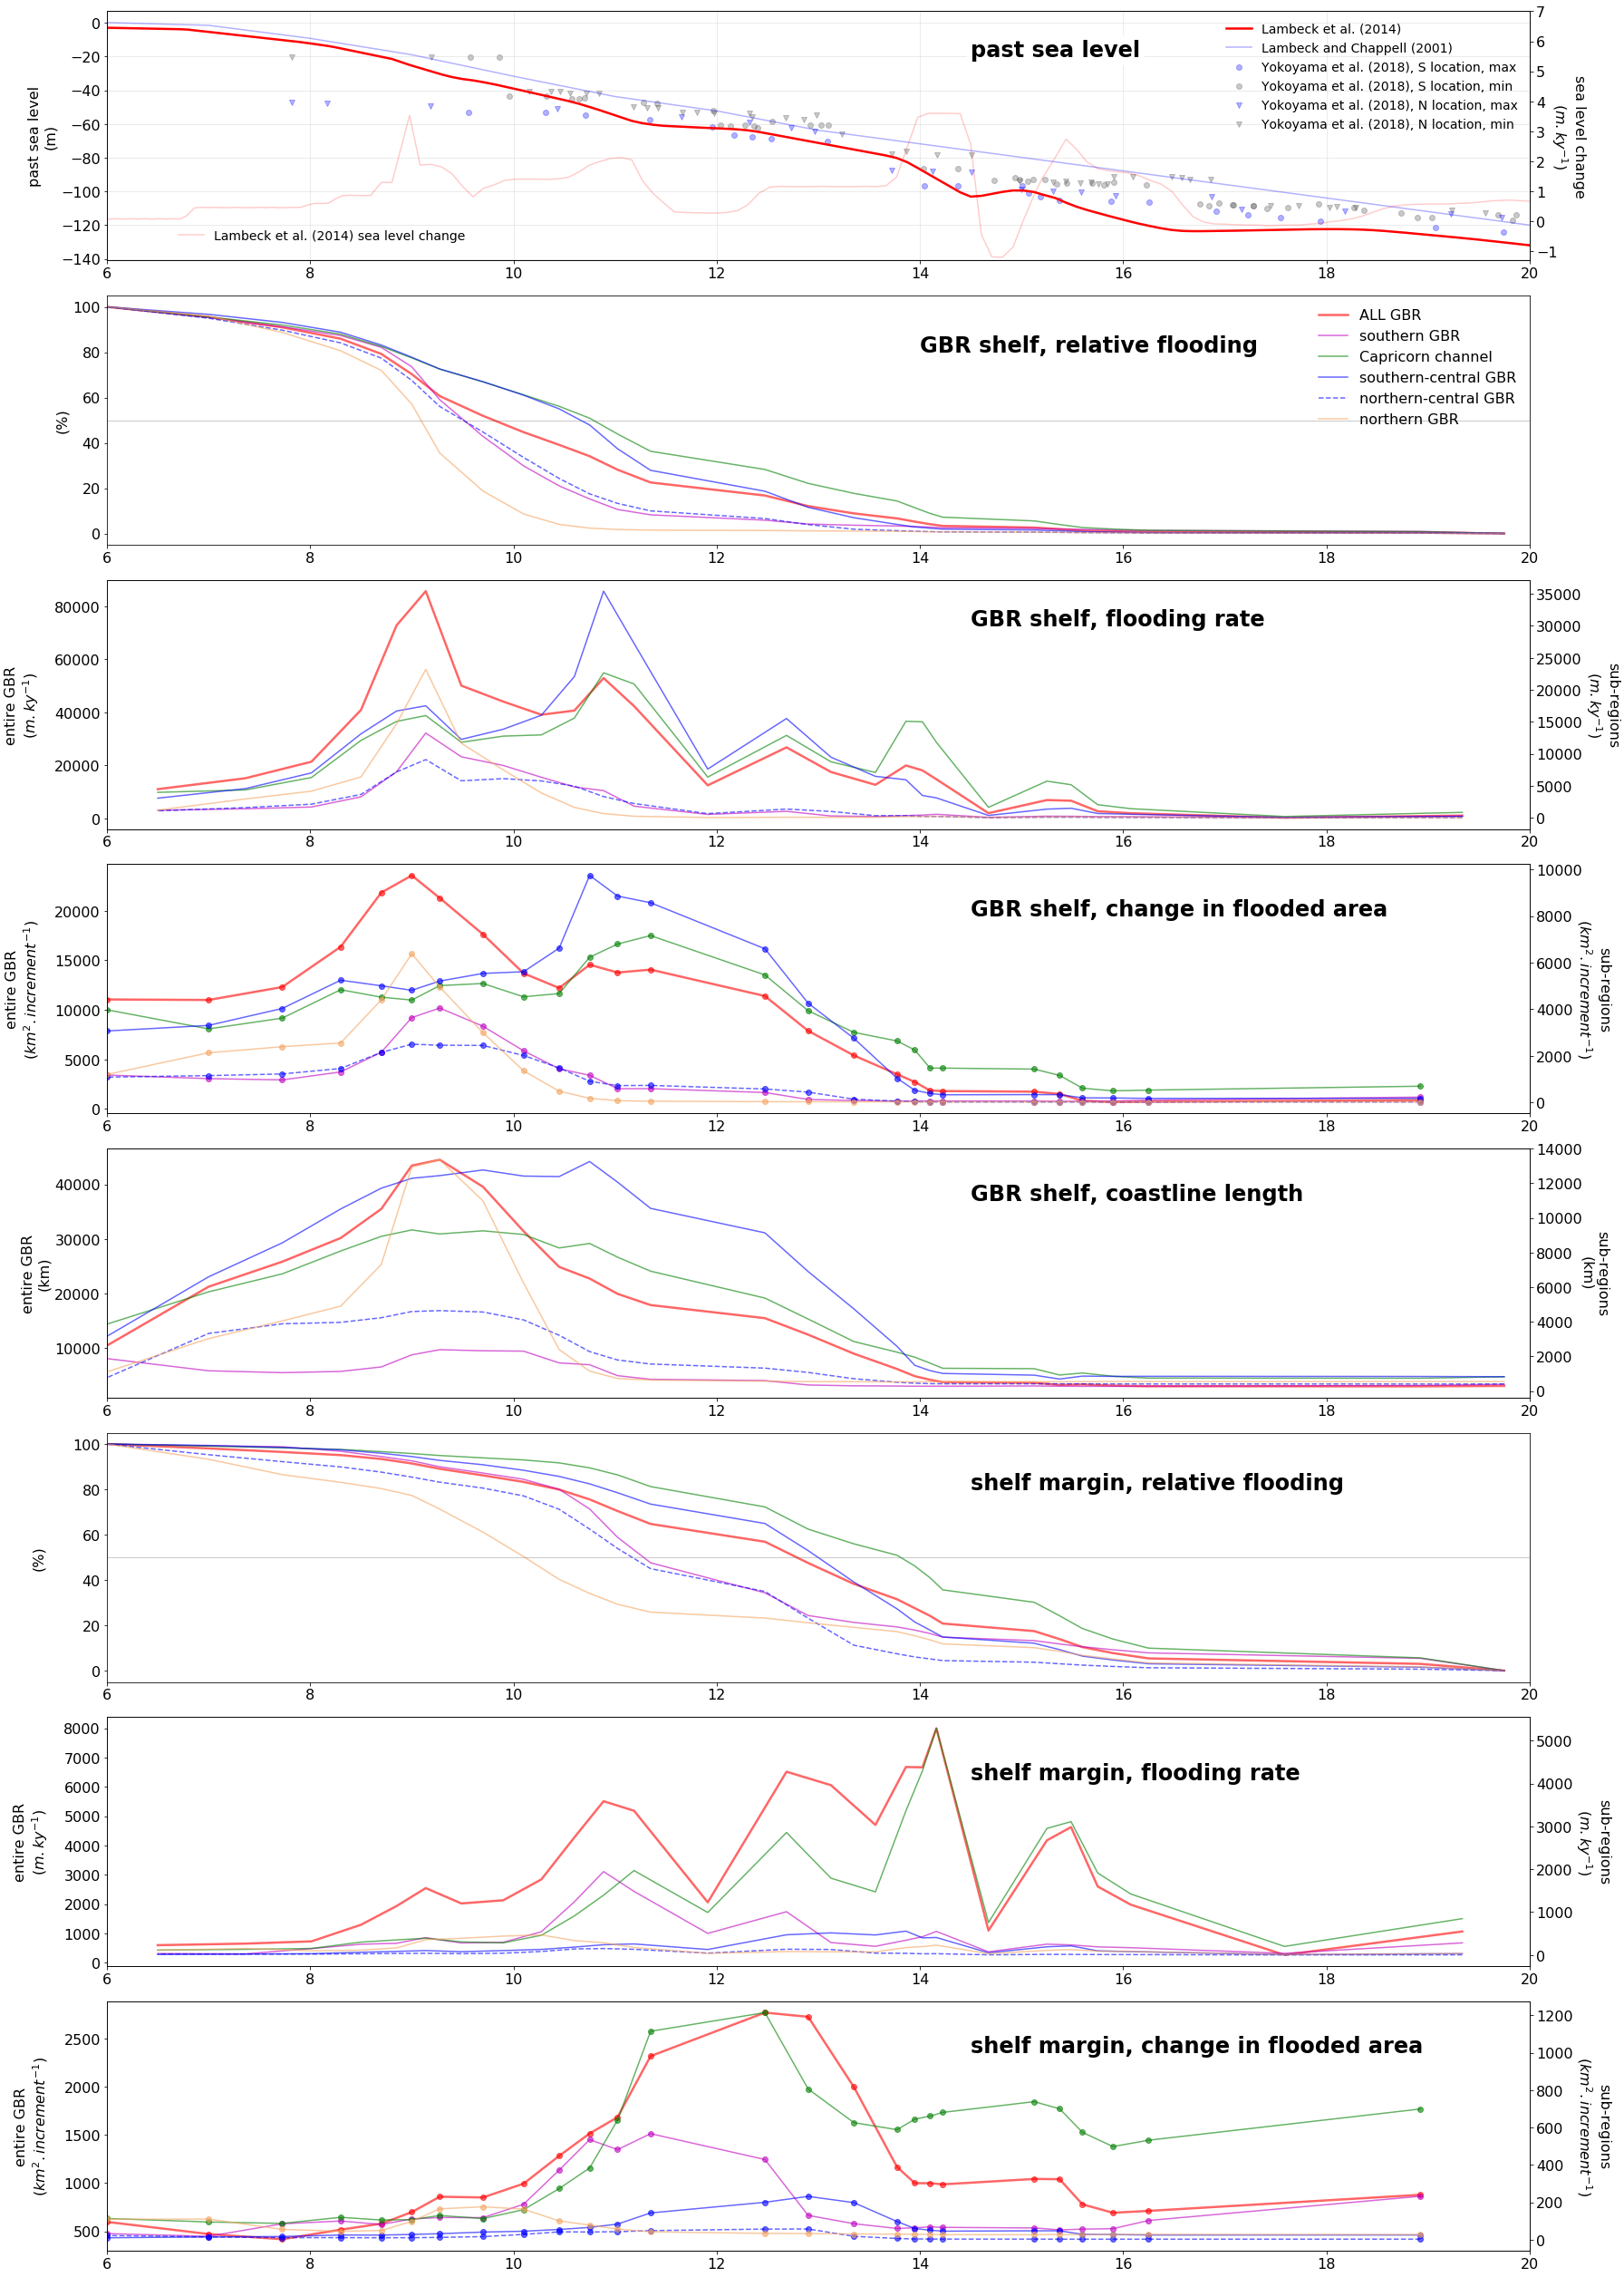

In [258]:
#x_axis = sealevels
x_axis = sea_level_resamp.age
#x_axis = np.flip(x_axis, axis=0)
#x_axis = age

n = 8 # number of subplots

fig = plt.figure(figsize=(25,35))
alpha=0.6
#sns.set(style="whitegrid", rc={"lines.linewidth": 2.5})
sns.palettes=(sns.color_palette("cubehelix", 8))

plt.subplot(n,1,1)
#plt.plot(resamp_sealevel.index, resamp_sealevel.resampsl, c='r')
plt.plot(sea_level_curve.index, sea_level_curve.sealevel, c='r', linewidth=2.5)
plt.plot(sea_level_lambeck2001.age_ka, -sea_level_lambeck2001.sl_m, c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka)'], -sea_level_325_hydro['Max RSL (mbsl)'], c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka).1'], -sea_level_325_hydro['Min RSL (mbsl)'], c='0.3', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka)'], -sea_level_325_nog['Max RSL (mbsl)'], marker='v', c='b', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka).1'], -sea_level_325_nog['Min RSL (mbsl)'], marker='v', c='0.3', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.3)
plt.xlim(6,20)
plt.ylabel('past sea level\n(m)', fontsize=16)
plt.text(14.5, -20, 'past sea level', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.legend(['Lambeck et al. (2014)', 'Lambeck and Chappell (2001)', 'Yokoyama et al. (2018), S location, max',
           'Yokoyama et al. (2018), S location, min', 'Yokoyama et al. (2018), N location, max',
           'Yokoyama et al. (2018), N location, min'], fontsize=14, frameon=False)
plt.twinx()
plt.plot(sea_level_curve.index, -sea_level_curve.sealevel.diff(), c='r', alpha=0.2)
plt.ylabel('sea level change\n($m . ky^{-1}$)', fontsize=16, rotation=-90, labelpad=30)
plt.yticks(fontsize=16)
plt.ylim(-1.3, 7)
plt.legend(['Lambeck et al. (2014) sea level change'], bbox_to_anchor=(0.26, 0.17), fontsize=14, frameon=False)



plt.subplot(n,1,2)
df = flooded_area_perc
ax = plt.plot(x_axis, df['ALL GBR'], color='r', alpha=alpha, linewidth=2.5)
plt.plot(x_axis, df['southern GBR'], c='m', alpha=alpha)
plt.plot(x_axis, df['Capricorn channel'], c='g', alpha=alpha)
plt.plot(x_axis, df['southern-central GBR'], c='b', alpha=alpha)
plt.plot(x_axis, df['northern-central GBR'], c='b', linestyle="--", alpha=alpha)
plt.plot(x_axis, df['northern GBR'], c='sandybrown', alpha=alpha)
plt.plot([6,20], [50,50], c='0.3', alpha=0.3, linewidth=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.gca().invert_xaxis()
plt.text(14.0, 80, 'GBR shelf, relative flooding', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('(%)', fontsize=16)
plt.legend(flooded_area_perc.columns[:-1], fontsize=16, frameon=False)
plt.xticks(fontsize=16)
plt.xlim(6,20)



plt.subplot(n,1,3)
df = flooding_rate
ax = plt.plot(flooding_rate.age_corr, df.ALL_GBR_time, color='r', alpha=alpha, linewidth=2.5)
plt.ylabel('entire GBR\n($m . ky^{-1}$)', fontsize=16, labelpad=15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.twinx()
plt.plot(flooding_rate.age_corr, df.southern_GBR_time, c='m', alpha=alpha)
plt.plot(flooding_rate.age_corr, df.Capricorn_channel_time, c='g', alpha=alpha)
plt.plot(flooding_rate.age_corr, df['southern-central_GBR_time'], c='b', alpha=alpha)
plt.plot(flooding_rate.age_corr, df['northern-central_GBR_time'], c='b', linestyle="--", alpha=alpha)
plt.plot(flooding_rate.age_corr, df.northern_GBR_time, c='sandybrown', alpha=alpha)
plt.yticks(fontsize=16)
#plt.gca().invert_xaxis()
plt.xticks(fontsize=16)
plt.text(14.5, 30000, 'GBR shelf, flooding rate', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('sub-regions\n($m . ky^{-1}$)', fontsize=16, rotation=-90, labelpad=40)
plt.xlim(6,20)

plt.subplot(n,1,4)
df = flooding_rate
ax = plt.plot(flooding_rate.age, df['ALL GBR'],  '-o', color='r', alpha=alpha, linewidth=2.5)
plt.ylabel('entire GBR\n($km^2 . increment^{-1}$)', fontsize=16, labelpad=15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.twinx()
plt.plot(flooding_rate.age, df['southern GBR'], '-o', c='m', alpha=alpha)
plt.plot(flooding_rate.age, df['Capricorn channel'], '-o', c='g', alpha=alpha)
plt.plot(flooding_rate.age, df['southern-central GBR'], '-o', c='b', alpha=alpha)
plt.plot(flooding_rate.age, df['northern-central GBR'], '-o', c='b', linestyle="--", alpha=alpha)
plt.plot(flooding_rate.age, df['northern GBR'], '-o', c='sandybrown', alpha=alpha)
#plt.gca().invert_xaxis()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(14.5, 8000, 'GBR shelf, change in flooded area', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('sub-regions\n($km^2 . increment^{-1}$)', fontsize=16, rotation=-90, labelpad=30)
plt.xlim(6,20)

plt.subplot(n,1,5)
df = coastline_length
ax = plt.plot(x_axis, df['ALL GBR'], color='r', alpha=alpha, linewidth=2.5)
plt.ylabel('entire GBR\n(km)', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.twinx()
plt.plot(x_axis, df['southern GBR'], c='m', alpha=alpha)
plt.plot(x_axis, df['Capricorn channel'], c='g', alpha=alpha)
plt.plot(x_axis, df['southern-central GBR'], c='b', alpha=alpha)
plt.plot(x_axis, df['northern-central GBR'], c='b', linestyle="--", alpha=alpha)
plt.plot(x_axis, df['northern GBR'], c='sandybrown', alpha=alpha)
plt.text(14.5, 11000, 'GBR shelf, coastline length', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('sub-regions\n(km)', fontsize=16, rotation=-90, labelpad=30)
plt.xlim(6,20)

plt.subplot(n,1,6)
df = shelf_edge_flooding
ax = plt.plot(x_axis, df['ALL GBR'], color='r', alpha=alpha, linewidth=2.5)
plt.plot(x_axis, df['southern GBR'], c='m', alpha=alpha)
plt.plot(x_axis, df['Capricorn channel'], c='g', alpha=alpha)
plt.plot(x_axis, df['southern-central GBR'], c='b', alpha=alpha)
plt.plot(x_axis, df['northern-central GBR'], c='b', linestyle="--", alpha=alpha)
plt.plot(x_axis, df['northern GBR'], c='sandybrown', alpha=alpha)
plt.plot([6,20], [50,50], c='0.3', alpha=0.3, linewidth=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(14.5, 80, 'shelf margin, relative flooding', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('(%)', fontsize=16, labelpad=30)
plt.xlim(6,20)

plt.subplot(n,1,7)
df = shelf_edge_flooding_rate
ax = plt.plot(shelf_edge_flooding_rate.age_corr, df.ALL_GBR_time, color='r', alpha=alpha, linewidth=2.5)
plt.ylabel('entire GBR\n($m . ky^{-1}$)', fontsize=16, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.twinx()
plt.plot(shelf_edge_flooding_rate.age_corr, df.southern_GBR_time, c='m', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age_corr, df.Capricorn_channel_time, c='g', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age_corr, df['southern-central_GBR_time'], c='b', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age_corr, df['northern-central_GBR_time'], c='b', linestyle="--", alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age_corr, df.northern_GBR_time, c='sandybrown', alpha=alpha)
#plt.gca().invert_xaxis()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(14.5, 4100, 'shelf margin, flooding rate', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('sub-regions\n($m . ky^{-1}$)', fontsize=16, rotation=-90, labelpad=40)
plt.xlabel('ka BP', fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(6,20)

plt.subplot(n,1,8)
df = shelf_edge_flooding_rate
ax = plt.plot(shelf_edge_flooding_rate.age, df['ALL GBR'], '-o', color='r', alpha=alpha, linewidth=2.5)
plt.ylabel('entire GBR\n($km^2 . increment^{-1}$)', fontsize=16, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.twinx()
plt.plot(shelf_edge_flooding_rate.age, df['southern GBR'], '-o', c='m', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age, df['Capricorn channel'], '-o', c='g', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age, df['southern-central GBR'],'-o', c='b', alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age, df['northern-central GBR'], '-o',c='b', linestyle="--", alpha=alpha)
plt.plot(shelf_edge_flooding_rate.age, df['northern GBR'], '-o',c='sandybrown', alpha=alpha)
#plt.gca().invert_xaxis()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(14.5, 1000, 'shelf margin, change in flooded area', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('sub-regions\n($km^2 . increment^{-1}$)', fontsize=16, rotation=-90, labelpad=40)
plt.xlabel('ka BP', fontsize=16)
plt.xlim(6,20)


plt.savefig('./figures_review/figure_3-i_review.svg')
plt.savefig('./figures_review/figure_3-i_review.pdf')

plt.tight_layout()


### other plots of figure 3 

In [179]:
from skimage import io
from skimage import util

In [180]:
#fig3.shape

In [181]:
fig3 = io.imread('/Users/gus/Documents/GBR/Flooding_GBR/Figures png/figure_3_.png')
fig3_crop = fig3[3590:]

plt.figure(figsize=(20,20))

plt.subplot(211)

#plt.plot(resamp_sealevel.index, resamp_sealevel.resampsl, c='r')
plt.plot(sea_level_resamp.age, sea_level_resamp.sealevel, c='r', linewidth=2.5)
plt.plot(sea_level_lambeck2001.age_ka, -sea_level_lambeck2001.sl_m, c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka)'], -sea_level_325_hydro['Max RSL (mbsl)'], c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka).1'], -sea_level_325_hydro['Min RSL (mbsl)'], c='0.3', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka)'], -sea_level_325_nog['Max RSL (mbsl)'], marker='v', c='b', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka).1'], -sea_level_325_nog['Min RSL (mbsl)'], marker='v', c='0.3', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(6,20)
plt.ylabel('past sea level (m)', fontsize=12)
plt.text(14, -20, 'past sea level', family='sans-serif', weight='bold', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.legend(['Lambeck et al. (2014)', 'Lambeck and Chappell (2001)', 'Yokoyama et al. (2018), S location, max',
           'Yokoyama et al. (2018), S location, min', 'Yokoyama et al. (2018), N location, max',
           'Yokoyama et al. (2018), N location, min'], fontsize=12)
plt.twinx()
plt.plot(sea_level_curve.index, -sea_level_curve.sealevel.diff(), c='r', alpha=0.2)
plt.ylabel('sea level change (m/ky)', fontsize=12, rotation=-90, labelpad=30)
plt.yticks(fontsize=16)
plt.ylim(-1.3, 7)
plt.legend(['Lambeck et al. (2014) sea level change'], bbox_to_anchor=(0.22, 0.17), fontsize=12)


plt.subplot(212)
io.imshow(fig3_crop)
plt.grid(False)


### Figure 3 - second part but with real data

In [182]:
# MARs
ODP820 = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/MARs_from_Bostock2009 - ODP820.csv')
PC16 = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/MARs_from_Bostock2009 - PC16.csv')
GC25 = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/MARs_from_Bostock2009 - GC25.csv')
GC12 = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/MARs_from_Bostock2009 - GC12.csv')
GC10 = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/MARs_from_Bostock2009 - GC10.csv')


In [183]:
ODP820 = ODP820[['Age', 'MAR carb 820', 'MAR sil 820']]
ODP820.columns = ['Age', 'MAR_carb', 'MAR_sil']

In [184]:
PC16 = PC16[['Unnamed: 0', 'MAR carb PC16', 'MAR sil PC16']]
PC16.columns = ['Age', 'MAR_carb', 'MAR_sil']

In [185]:
GC25 = GC25[['Unnamed: 0', 'MAR Carb GC25', 'MAR sil GC25']]
GC25.columns = ['Age', 'MAR_carb', 'MAR_sil']

In [186]:
GC12 = GC12[['Unnamed: 0', 'MAR carb GC12', 'MAR sil GC12']]
GC12.columns = ['Age', 'MAR_carb', 'MAR_sil']

In [187]:
GC10 = GC10[['Unnamed: 0', 'MAR carb GC10', 'MAR sil GC10']]
GC10.columns = ['Age', 'MAR_carb', 'MAR_sil']

In [188]:
# GRs
M0031A_TP = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0031A_TP.csv')
M0036A_TP = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0036A_TP.csv', header=None)
M0042A_OH = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0042A_OH.csv')
M0042A_TP = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0042A_TP.csv')
M0054B_OH = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0054B_OH.csv')
M0054B_TP = pd.read_csv('/Users/gus/Documents/GBR/Flooding_GBR/notebook/M0054B_TP.csv')


In [189]:
M0031A_TP = M0031A_TP[['Interpolated ages from graphs // coral samples (ka BP)', 'TGR TP cps']]
M0031A_TP.columns = ['Age', 'TGR_TP']
M0031A_TP = M0031A_TP[M0031A_TP.Age < 16.5]

In [190]:
M0036A_TP = M0036A_TP.iloc[:, [3,7]]
M0036A_TP.columns = ['Age', 'TGR_TP']

In [191]:
M0042A_TP = M0042A_TP.iloc[:, [3,7]]
M0042A_TP.columns = ['Age', 'TGR_TP']
M0042A_TP = M0042A_TP[M0042A_TP.Age < 14.5]


In [192]:
M0042A_OH = M0042A_OH.iloc[:, [3,8]]
M0042A_OH.columns = ['Age', 'TGR_OH']
M0042A_OH = M0042A_OH[M0042A_OH.TGR_OH != -9999.]
M0042A_OH = M0042A_OH[M0042A_OH.TGR_OH < 60]
M0042A_OH = M0042A_OH[M0042A_OH.Age < 14.5]


In [193]:
M0054B_TP = M0054B_TP.iloc[:, [3,7]]
M0054B_TP.columns = ['Age', 'TGR_TP']

In [194]:
M0054B_OH = M0054B_OH.iloc[:, [3,8]]
M0054B_OH.columns = ['Age', 'TGR_OH']
M0054B_OH = M0054B_OH[M0054B_OH.TGR_OH != -9999.]

/Users/gus/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


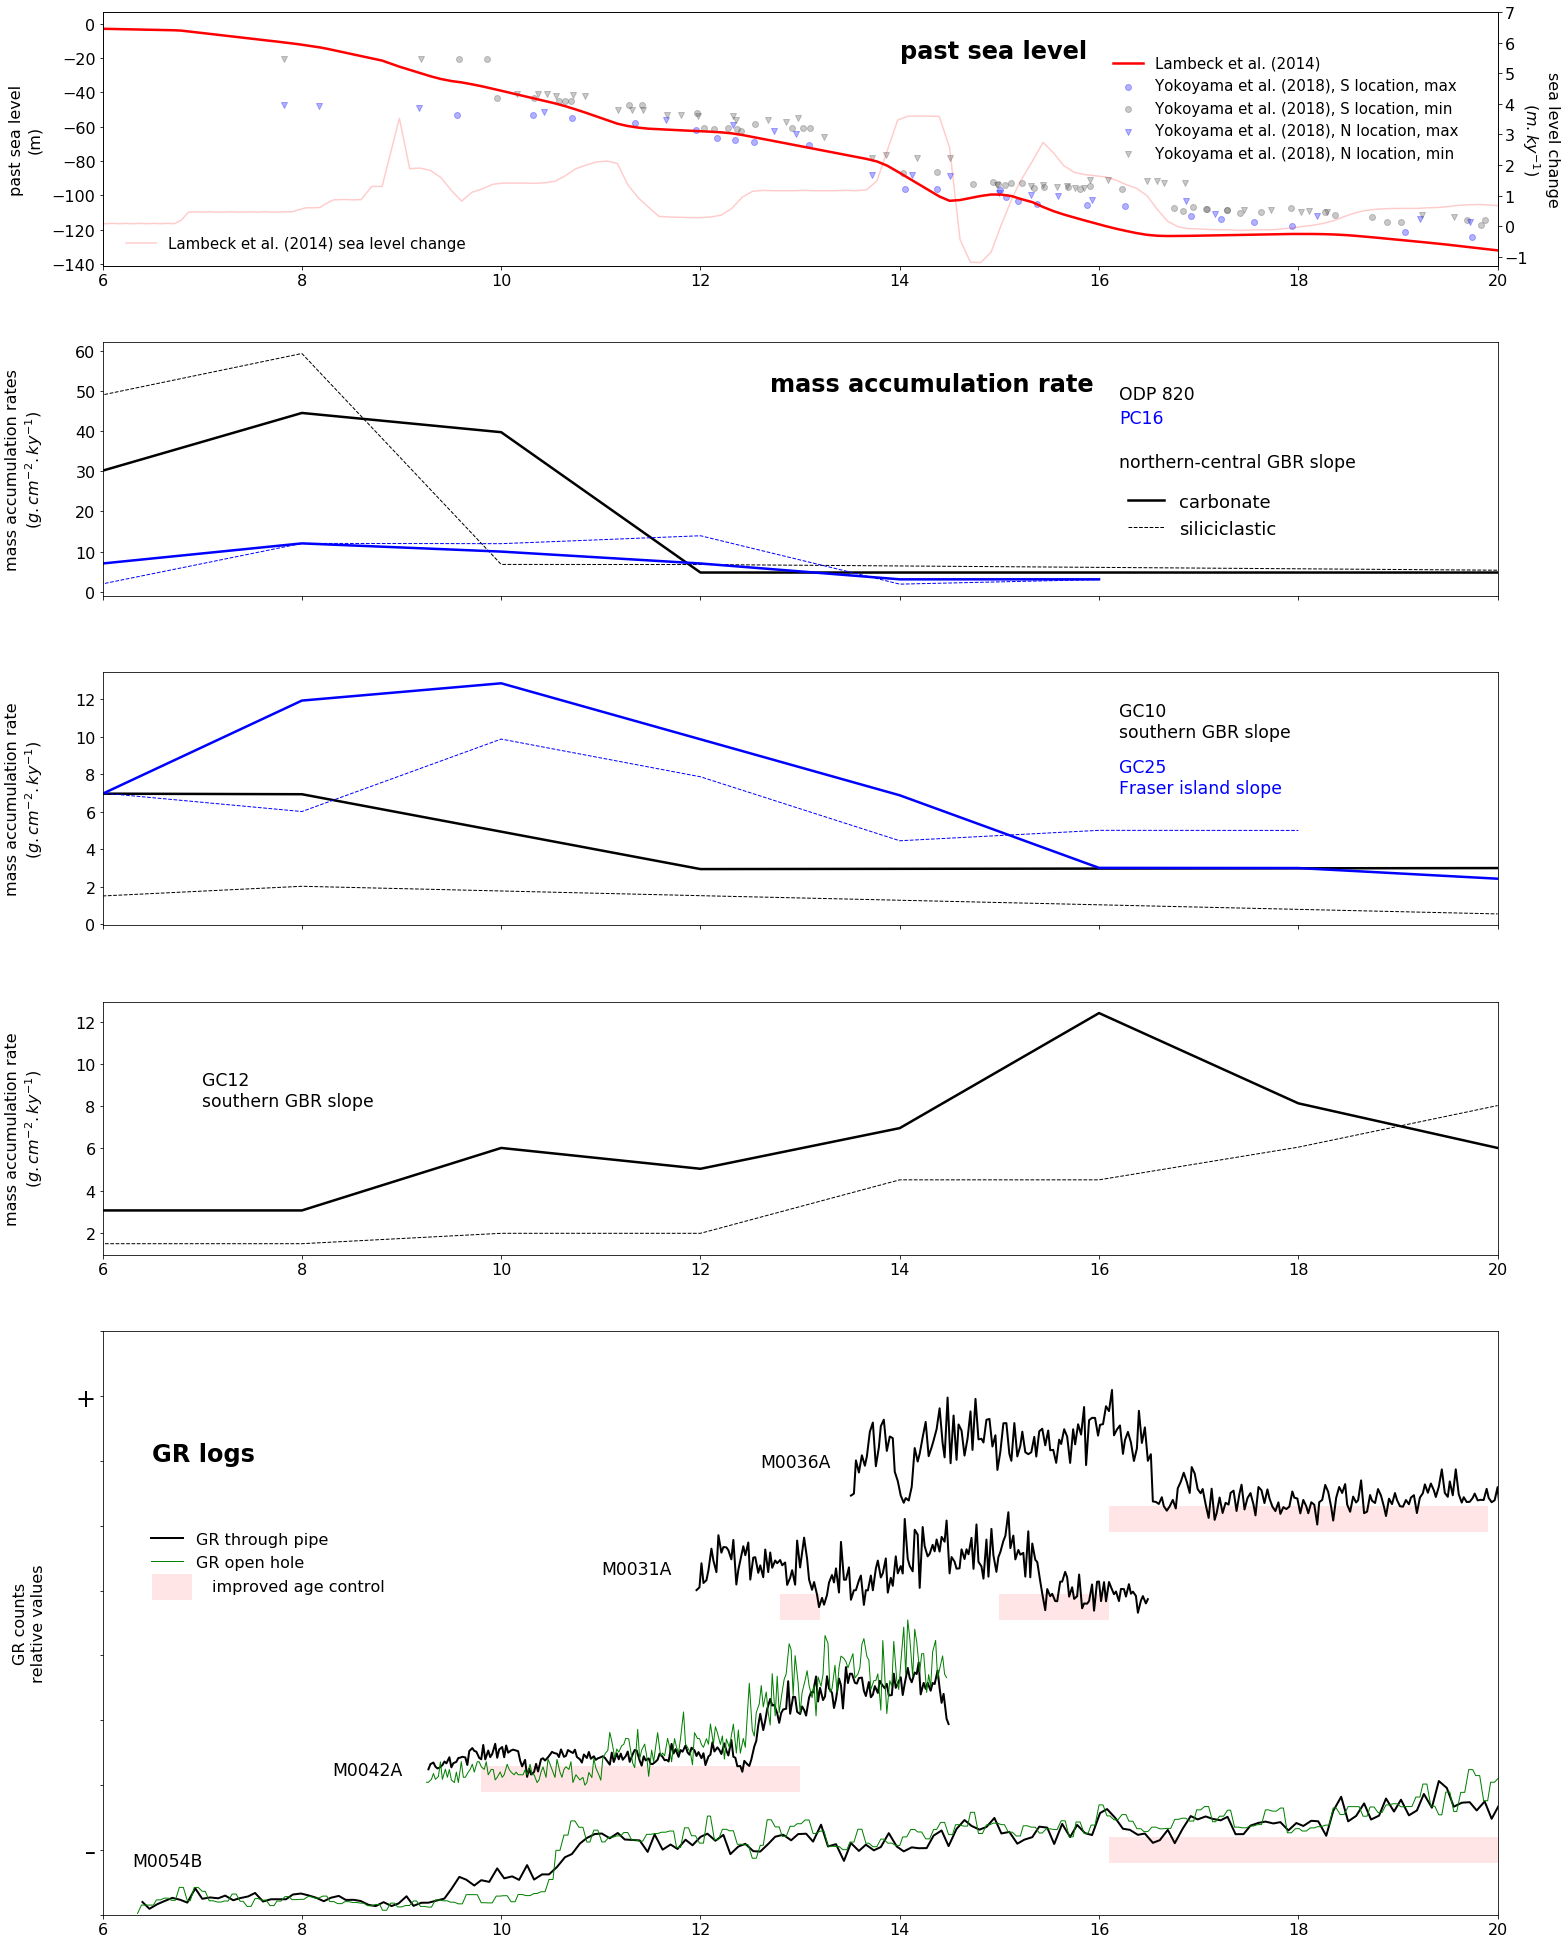

In [245]:
fig = plt.figure(figsize=(25,35))
alpha=0.6
grid = plt.GridSpec(6, 1, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
#plt.plot(resamp_sealevel.index, resamp_sealevel.resampsl, c='r')
plt.plot(sea_level_curve.index, sea_level_curve.sealevel, c='r', linewidth=2.5)
#plt.plot(sea_level_lambeck2001.age_ka, -sea_level_lambeck2001.sl_m, c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka)'], -sea_level_325_hydro['Max RSL (mbsl)'], c='b', alpha=0.3)
plt.scatter(sea_level_325_hydro['Age (ka).1'], -sea_level_325_hydro['Min RSL (mbsl)'], c='0.3', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka)'], -sea_level_325_nog['Max RSL (mbsl)'], marker='v', c='b', alpha=0.3)
plt.scatter(sea_level_325_nog['Age (ka).1'], -sea_level_325_nog['Min RSL (mbsl)'], marker='v', c='0.3', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(6,20)
plt.ylabel('past sea level\n(m)', fontsize=16, labelpad=10)
plt.text(14.0, -20, 'past sea level', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
plt.legend(['Lambeck et al. (2014)', 'Yokoyama et al. (2018), S location, max',
           'Yokoyama et al. (2018), S location, min', 'Yokoyama et al. (2018), N location, max',
           'Yokoyama et al. (2018), N location, min'], fontsize=15, loc=(0.72, 0.39), frameon=False)
plt.twinx()
plt.plot(sea_level_curve.index, -sea_level_curve.sealevel.diff(), c='r', alpha=0.2)
plt.ylabel('sea level change\n($m . ky^{-1}$)', fontsize=16, rotation=-90, labelpad=30)
plt.yticks(fontsize=16)
plt.ylim(-1.3, 7)
plt.legend(['Lambeck et al. (2014) sea level change'], bbox_to_anchor=(0.27, 0.17), fontsize=15, frameon=False)


ax2 = plt.subplot(grid[1, 0])
plt.plot(ODP820.Age, ODP820.MAR_carb, c='k', linewidth=2.5)
plt.plot(ODP820.Age, ODP820.MAR_sil, '--', c='k', linewidth=1)
plt.text(16.2, 48, 'ODP 820', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.legend(['carbonate', 'siliciclastic'], fontsize=18, loc=(0.73, 0.20), frameon=False)
plt.plot(PC16.Age, PC16.MAR_carb, c='b', linewidth=2.5)
plt.plot(PC16.Age, PC16.MAR_sil, '--', c='b', linewidth=1)
plt.text(16.2, 42, 'PC16', color='b', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.text(16.2, 31, 'northern-central GBR slope', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.xlim(6,20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax2.set_xticklabels([''])
plt.ylabel('mass accumulation rates\n($g . cm^{-2} . ky^{-1}$)', labelpad=30, fontsize=16)
plt.text(12.7, 50, 'mass accumulation rate', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))


ax3 = plt.subplot(grid[2, 0])
plt.plot(GC10.Age, GC10.MAR_carb, c='k', linewidth=2.5)
plt.plot(GC10.Age, GC10.MAR_sil, '--', c='k', linewidth=1)
plt.text(16.2, 10, 'GC10\nsouthern GBR slope', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.plot(GC25.Age, GC25.MAR_carb, c='b', linewidth=2.5)
plt.plot(GC25.Age, GC25.MAR_sil, '--', c='b', linewidth=1)
plt.text(16.2, 7, 'GC25\nFraser island slope', color='b', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.xlim(6,20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax3.set_xticklabels([''])
plt.ylabel('mass accumulation rate\n($g . cm^{-2} . ky^{-1}$)', labelpad=30, fontsize=16)


ax4 = plt.subplot(grid[3, 0])
plt.plot(GC12.Age, GC12.MAR_carb, c='k', linewidth=2.5)
plt.plot(GC12.Age, GC12.MAR_sil, '--', c='k', linewidth=1)
plt.text(7, 8, 'GC12\nsouthern GBR slope', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.xlim(6,20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('mass accumulation rate\n($g . cm^{-2} . ky^{-1}$)', labelpad=30, fontsize=16)


ax5 = plt.subplot(grid[4:, 0])
plt.plot(M0036A_TP.Age, M0036A_TP.TGR_TP*4+115, c='k', linewidth=2, label='_nolegend_')
plt.text(12.6, 138, 'M0036A', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.plot(M0031A_TP.Age, M0031A_TP.TGR_TP*4+85, c='k', linewidth=2, label='_nolegend_')
plt.text(11.0, 105, 'M0031A', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.plot(M0042A_TP.Age, M0042A_TP.TGR_TP*1.5+40, c='k', linewidth=2, label='_nolegend_')
plt.plot(M0042A_OH.Age, M0042A_OH.TGR_OH*1.5+40, c='g', linewidth=1, label='_nolegend_')
plt.text(8.3, 43, 'M0042A', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.plot(M0054B_TP.Age, M0054B_TP.TGR_TP*1.2, c='k', linewidth=2, label='GR through pipe')
plt.plot(M0054B_OH.Age, M0054B_OH.TGR_OH*1.2, c='g', linewidth=1, label='GR open hole')
plt.text(6.3, 15, 'M0054B', family='sans-serif', weight='normal', size='xx-large', bbox=dict(facecolor='white', edgecolor='white'))
plt.legend(loc=(0.03, 0.58), fontsize=16, frameon=False)
ax5.set_yticklabels(['', '–', '', '','', '', '', '', '+'], fontsize=24)
plt.xticks(fontsize=16)
plt.ylabel('GR counts\nrelative values', fontsize=16, labelpad=30)
plt.ylim(0,180)
plt.xlim(6,20)
plt.text(6.5, 140, 'GR logs', family='sans-serif', weight='bold', size=24, bbox=dict(facecolor='white', edgecolor='white'))
rect54B = patches.Rectangle((16.1,16),4,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)
rect42A = patches.Rectangle((9.8,38),3.2,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)
rect36A = patches.Rectangle((16.1,118),3.8,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)
rect31A_1 = patches.Rectangle((12.8,91),0.4,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)
rect31A_2 = patches.Rectangle((15,91),1.1,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)
rectLegend = patches.Rectangle((6.5,97),0.4,8,linewidth=1,edgecolor=None,facecolor='r', alpha=0.1)

ax5.add_patch(rect54B)
ax5.add_patch(rect42A)
ax5.add_patch(rect36A)
ax5.add_patch(rect31A_1)
ax5.add_patch(rect31A_2)
ax5.add_patch(rectLegend)
plt.text(7.1, 100, 'improved age control', fontsize=16)

plt.savefig('./figures_review/figure_3-ii_review.svg')
plt.savefig('./figures_review/figure_3-ii_review.pdf')

plt.tight_layout()


In [547]:
sea_level_curve

,nominal esl (m),sealevel,2 sigma error esl
age,,,
0.000,0.00,0.00,0.00
0.122,-0.21,-0.16,0.07
0.192,-0.21,-0.16,0.07
0.296,-0.21,-0.16,0.07
0.365,-0.21,-0.16,0.07
0.435,-0.21,-0.16,0.07
0.504,-0.21,-0.17,0.07
0.574,-0.21,-0.17,0.07
0.643,-0.21,-0.17,0.07


# colormaps

In [373]:
latitudes = [24.435,23.9884375,23.541875,23.0953125,22.64875,22.2021875,21.755625,21.3090625,20.8625,20.4159375,19.969375,19.5228125,19.07625,18.6296875,18.183125,17.7365625,17.29,16.8434375,16.396875,15.9503125,15.50375,15.0571875,14.610625,14.1640625,13.7175,13.2709375,12.824375,12.3778125,11.93125,11.4846875,11.038125,10.5915625,10.145]

latitudes_round = [round(x,1) for x in latitudes]
latitudes_round.reverse()

In [374]:
latitudes_round

[10.1,
 10.6,
 11.0,
 11.5,
 11.9,
 12.4,
 12.8,
 13.3,
 13.7,
 14.2,
 14.6,
 15.1,
 15.5,
 16.0,
 16.4,
 16.8,
 17.3,
 17.7,
 18.2,
 18.6,
 19.1,
 19.5,
 20.0,
 20.4,
 20.9,
 21.3,
 21.8,
 22.2,
 22.6,
 23.1,
 23.5,
 24.0,
 24.4]

In [375]:
latitudes_round[0::5]

[10.1, 12.4, 14.6, 16.8, 19.1, 21.3, 23.5]

In [376]:
latitudes_round = latitudes_round[0::5]

In [377]:
latitudes_round

[10.1, 12.4, 14.6, 16.8, 19.1, 21.3, 23.5]

In [378]:
sealevels

array([-130, -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75,
       -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5,
       0], dtype=object)

In [379]:
sea_level_maxCoastLength = [-30.0,-35.0,-40.0,-40.0,-70.0,-60.0,-20.0,-35.0,-50.0,-50.0,-65.0,-50.0,-50.0,-50.0,-30.0,-25.0,-40.0,-40.0,-35.0,-30.0,-35.0,-30.0,-30.0,-20.0,-20.0,-25.0,-25.0,-25.0,-25.0,-30.0,-30.0,-30.0,-20.0]



In [380]:
len(latitudes)

33

In [381]:
len(sea_level_maxCoastLength)

33

### shelf flooding

In [382]:
shelf_flooding_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/area_km2_all_gbr_zones.xlsx', has_index_names=True)


/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [383]:
shelf_flooding_summary

,WHOLE GBR BATHYMETRY,"marine flooded area, raw (km2)",3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,NaN,-130,824.347990,3185.777565,9688.117675,12290.712274,8851.080025,6270.049555,5326.630875,4555.022588,...,624.927789,662.144849,273.314905,292.501019,625.961700,733.309391,760.056354,982.650944,2194.880938,1416.892016
1,NaN,-125,828.607717,3195.298792,9692.339532,12505.190945,9146.797618,6314.101836,5382.949802,4590.309107,...,626.754553,664.075198,275.315590,295.988443,629.918275,745.447401,764.307863,984.189007,2196.207151,1418.166526
2,NaN,-120,833.024162,3205.469523,9708.299356,12577.513153,9384.456157,6367.751136,5450.329032,4627.330073,...,628.599528,666.318309,277.509381,299.709424,634.080099,757.928636,768.033189,986.155385,2197.854239,1419.453343
3,NaN,-115,837.495895,3216.048564,9718.462688,12611.467827,9559.282301,6501.931334,5508.187138,4667.934411,...,630.901051,669.300619,279.844925,303.934730,638.244504,769.966356,771.752960,987.863200,2199.286914,1420.805068
4,NaN,-110,844.154105,3225.931532,9731.342242,12638.673298,9769.687409,6732.014207,5554.749250,4710.097130,...,633.013289,671.967360,281.421705,307.354363,642.811530,781.300410,775.576992,989.769956,2200.873608,1422.011789
5,NaN,-105,849.794086,3236.361778,9742.143215,12664.613603,10197.717219,7289.787743,5599.573366,4760.701609,...,635.370469,674.941625,283.923646,311.196884,646.737366,792.851975,780.025869,991.537171,2202.335158,1423.636331
6,NaN,-100,855.336226,3246.725872,9750.583315,12703.246022,10661.204934,8027.671453,5645.960978,4830.715268,...,638.231751,678.652246,286.626591,314.915754,650.475615,803.338582,783.793432,993.705895,2204.059038,1424.730991
7,NaN,-95,862.989317,3258.237719,9763.204397,12737.604552,11205.458118,8717.316706,5710.849499,4873.574544,...,641.033431,681.436775,288.698979,318.622241,654.295514,815.099345,787.932426,995.419081,2205.667211,1426.238433
8,NaN,-90,869.625523,3271.064062,9777.097029,12772.960691,11665.078874,9327.342006,5935.554801,4919.278428,...,644.556324,685.347716,291.384714,322.443299,657.984925,827.094325,792.404793,997.420305,2207.447731,1427.564250
9,NaN,-85,876.320371,3285.442380,9790.080074,12802.743751,12056.001208,9930.105328,6941.470672,5001.290856,...,648.064621,688.800593,293.777631,326.660112,662.151275,838.840426,796.958565,999.758663,2209.009331,1429.031218


In [384]:
shelf_flooding_summary = np.array(shelf_flooding_summary.iloc[:,2:])

### edge flooding

In [385]:
edge_flooding_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/area_cum_km2_all_se_zones.xlsx', has_index_names=True)

/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [386]:
edge_flooding_summary = np.array(edge_flooding_summary.iloc[:,2:])

### shelf rate

In [387]:
shelf_rate_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/flood_rate_all_gbr_zones.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [388]:
shelf_rate_summary = np.array(shelf_rate_summary.iloc[:,2:])

### shelf edge rate

In [389]:
edge_rate_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/flood_rate_all_se_zones.xlsx', has_index_names=True)


/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [390]:
edge_rate_summary = np.array(edge_rate_summary.iloc[:,2:])

In [391]:
edge_rate_summary[0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Plot with sea levels

In [392]:
len(sealevels)

27

In [393]:
np.linspace(26,0,14)

array([ 26.,  24.,  22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,   6.,
         4.,   2.,   0.])

In [394]:
sl_maxCoastLength = [x/5+26 for x in sea_level_maxCoastLength]

In [395]:
sl_maxCoastLength.reverse

<function list.reverse>

In [396]:
latitude_index = [x for x in range(33)]

In [397]:
latitude_index.reverse()

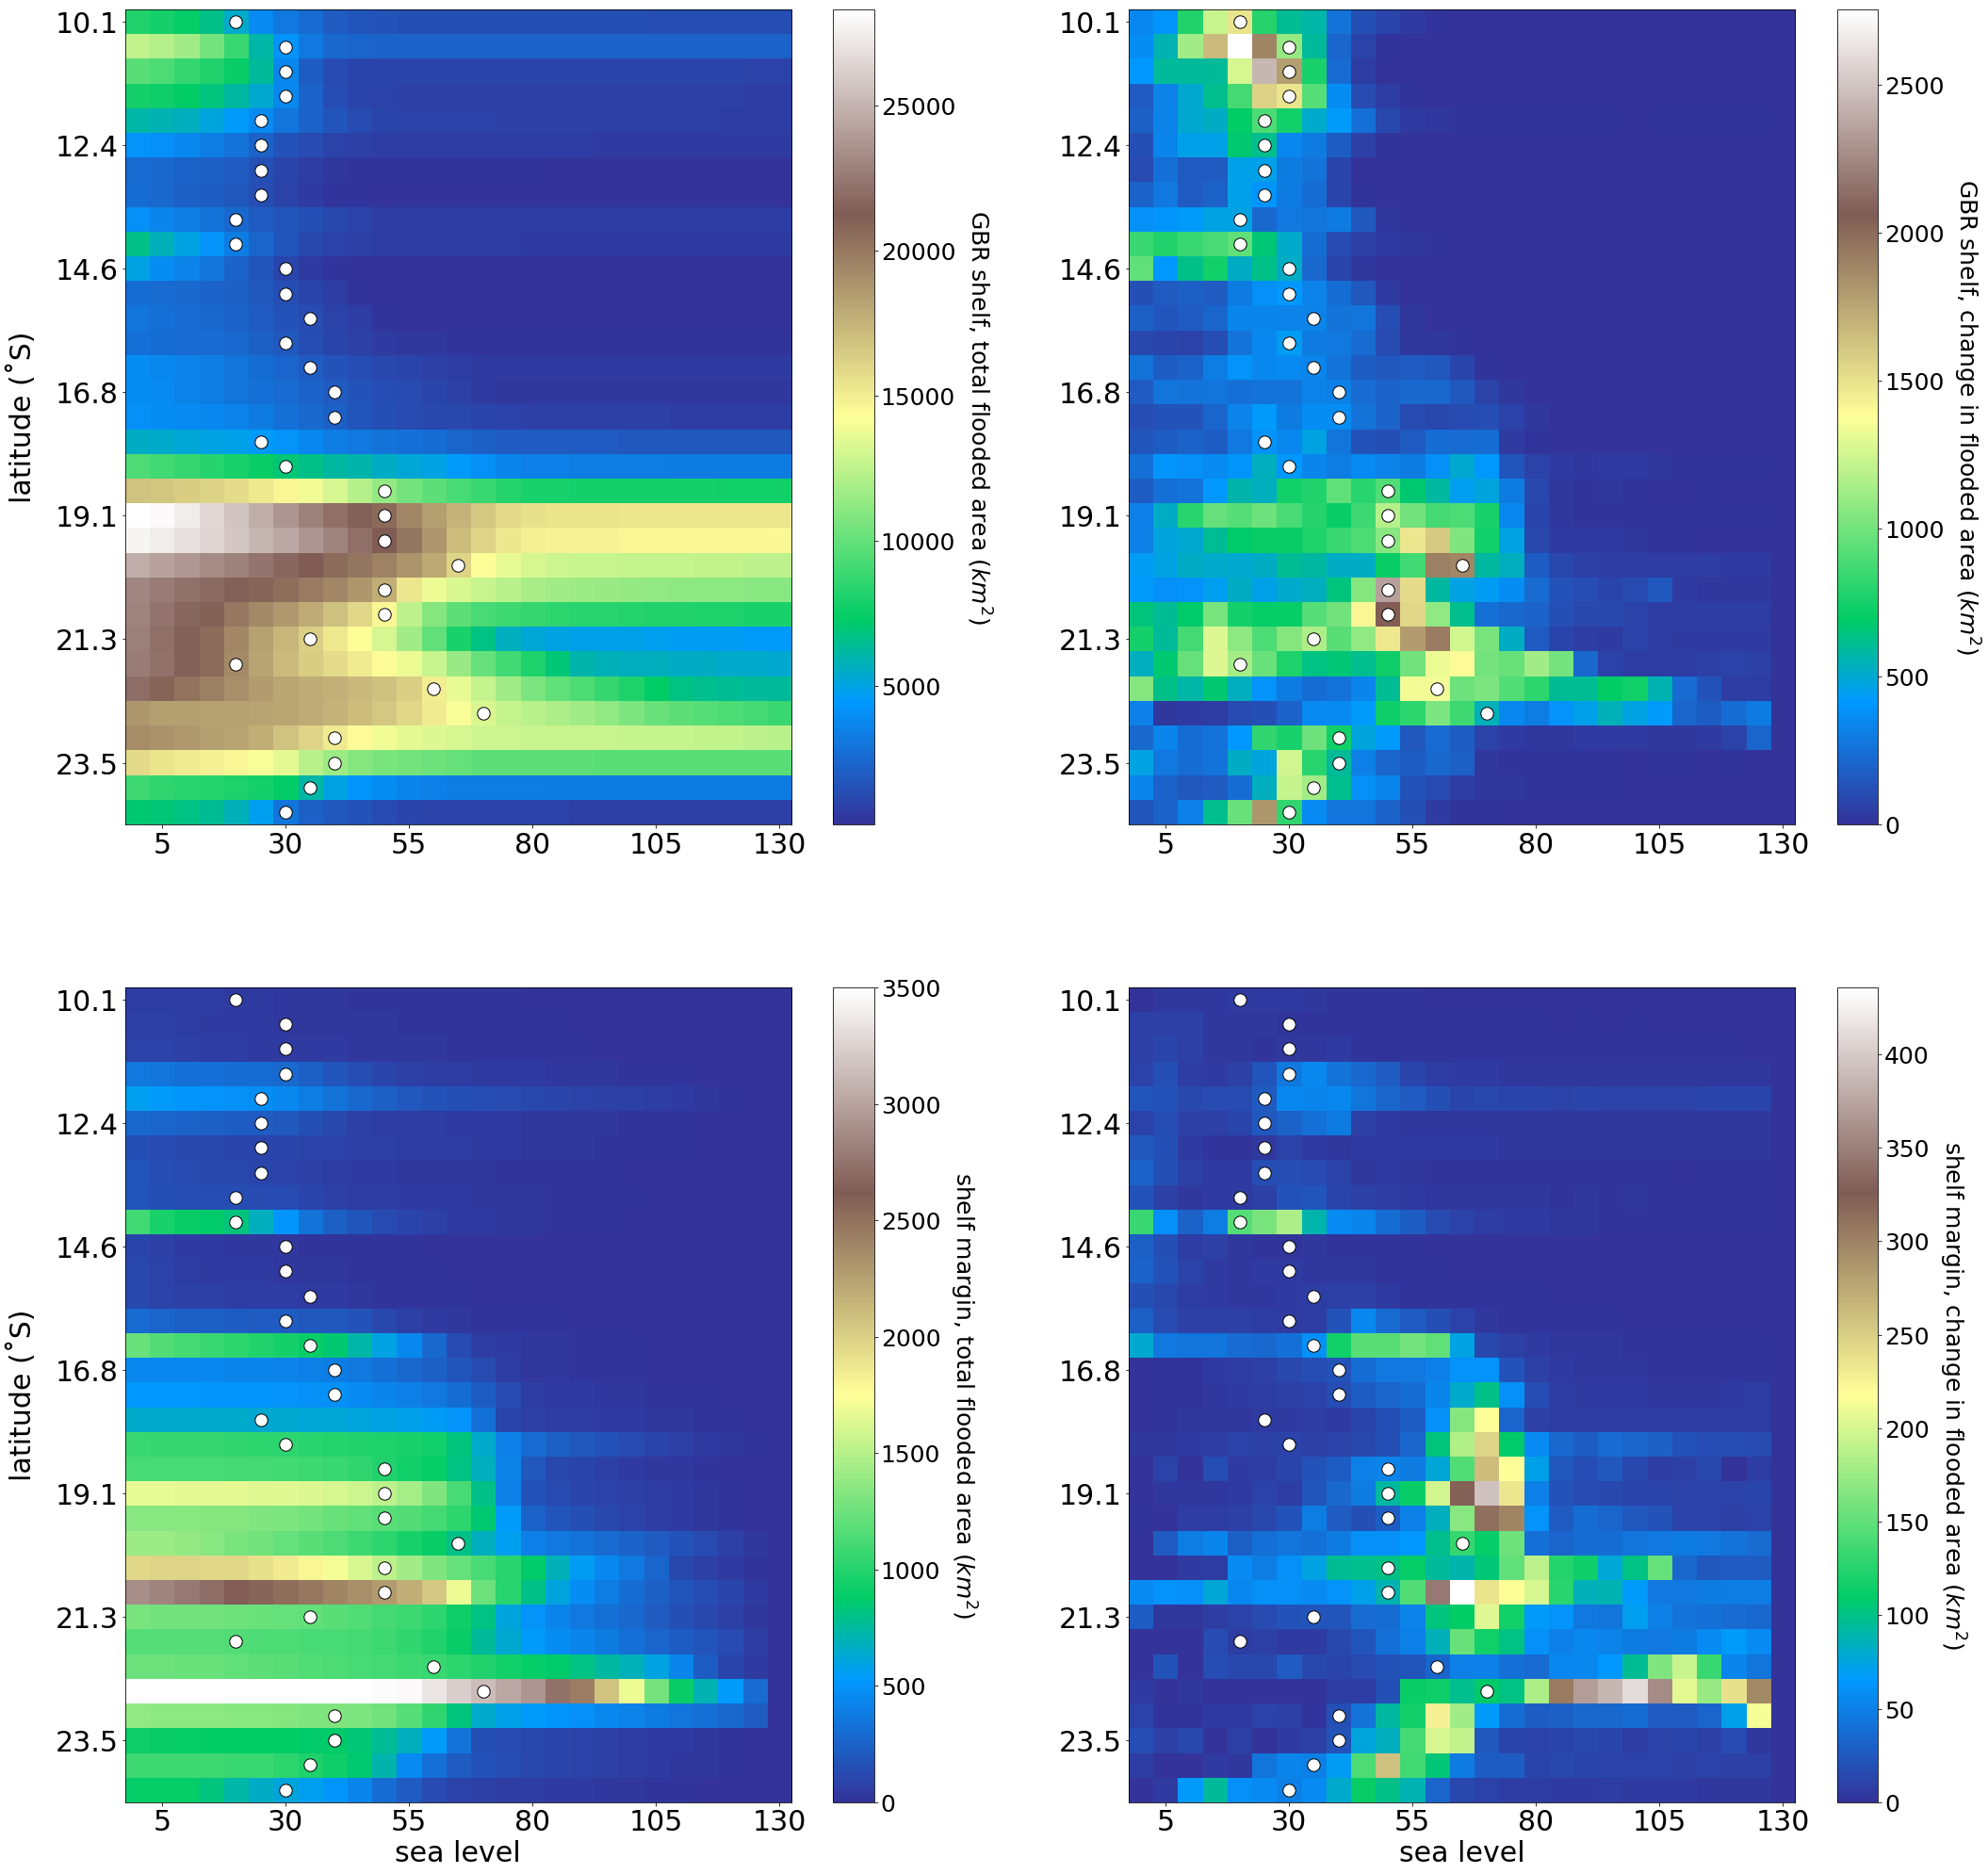

In [398]:
plt.figure(figsize=(35,35))

plt.subplot(221)
ax1=plt.imshow(np.rot90(shelf_flooding_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='GBR shelf, total flooded area ($km^2$)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25)
plt.ylabel('latitude (˚S)', fontsize=30, labelpad=20)
plt.xticks([0, 5, 10, 15, 20, 25])
ax1.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=30)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax1.axes.set_yticklabels(latitudes_round[:], fontsize=30)
plt.scatter(sl_maxCoastLength, latitude_index, marker='o', s=180, c='w', edgecolor='k')

plt.subplot(222)
ax2=plt.imshow(np.rot90(shelf_rate_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='GBR shelf, change in flooded area ($km^2$)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25)
plt.xticks([0, 5, 10, 15, 20, 25])
ax2.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=30)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax2.axes.set_yticklabels(latitudes_round[:], fontsize=30)
plt.scatter(sl_maxCoastLength, latitude_index, marker='o', s=180, c='w', edgecolor='k')


plt.subplot(223)
ax3 = plt.imshow(np.rot90(edge_flooding_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='shelf margin, total flooded area ($km^2$)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25)
plt.ylabel('latitude (˚S)', fontsize=30, labelpad=20)
plt.xlabel('sea level', fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 25])
ax3.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=30)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax3.axes.set_yticklabels(latitudes_round[:], fontsize=30)
plt.scatter(sl_maxCoastLength, latitude_index, marker='o', s=180, c='w', edgecolor='k')


plt.subplot(224)
ax4=plt.imshow(np.rot90(edge_rate_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='shelf margin, change in flooded area ($km^2$)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25) 
plt.xlabel('sea level', fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 25])
ax4.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=30)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax4.axes.set_yticklabels(latitudes_round[:], fontsize=30)
plt.scatter(sl_maxCoastLength, latitude_index, marker='o', s=180, c='w', edgecolor='k')



plt.savefig('./figures_review/fig4_review.svg')
plt.show()

### plot with ages<br>
we need to extract the x, y, z's for each property<br>
then resample to the desired grid


In [ ]:
points = []
sealevels_or_age = sealevels
df = shelf_flooding_summary
for i in range(len(sealevels_or_age)):
    for j in range(len(latitudes)):
        point = (sealevels_or_age[i], latitudes[j], df[i][j])
        points.append(point)

In [ ]:
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed

# define grid.
xi = np.linspace(20,6,29)
yi = latitudes

# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi, yi, zi, 15, cmap='jet')
plt.colorbar() 

plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()


## Plot with ages for coastline

#### coastline length

In [364]:
coastline_length_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/coastline_length_all_gbr_zones.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [365]:

coastline_length_summary.head()



,WHOLE GBR BATHYMETRY,coastline length (km),3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,NaN,-130,72.643901,82.673210,60.534232,176.135901,178.294287,64.315297,61.821733,88.670641,...,153.665905,88.976300,64.757765,68.604616,83.319084,191.821978,91.900406,52.289862,52.742045,38.326637
1,NaN,-125,72.194781,82.794375,60.380513,109.988882,158.347553,62.030164,57.558024,90.427680,...,154.643064,89.000799,65.055241,69.096027,83.287083,190.698901,91.680172,52.437247,52.687122,38.224168
2,NaN,-120,72.222528,83.043568,60.461854,65.111027,157.314494,100.957546,65.886874,93.997384,...,156.727532,88.750790,65.320012,69.646042,83.570032,189.502251,91.318742,52.648867,52.876486,38.087233
3,NaN,-115,74.254073,83.107253,60.094872,61.345524,175.910288,196.859248,68.793720,92.798073,...,154.124185,88.937575,65.960257,72.948624,83.472739,186.193922,91.291023,52.672849,53.311479,38.017276
4,NaN,-110,73.127372,83.114086,60.667920,59.731919,227.422174,334.416414,65.146157,92.555886,...,156.757275,89.694126,66.039987,72.116796,81.363391,182.655287,91.218131,53.012291,52.975268,38.329104


In [366]:
coastline_length_summary = np.array(coastline_length_summary.iloc[0:27,2:])



#### coastline length norm LGM

In [367]:
coastline_length_normLGM_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/coastline_length_norm_LGM_all_gbr_zones.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [368]:
coastline_length_normLGM_summary

,WHOLE GBR BATHYMETRY,"coastline length, normalized to LGM values (km)",3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,NaN,-130,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,NaN,-125,0.993818,1.001466,0.997461,0.624455,0.888125,0.964470,0.931032,1.019815,...,1.006359,1.000275,1.004594,1.007163,0.999616,0.994145,0.997604,1.002819,0.998959,0.997326
2,NaN,-120,0.994199,1.004480,0.998804,0.369664,0.882331,1.569728,1.065756,1.060073,...,1.019924,0.997466,1.008682,1.015180,1.003012,0.987907,0.993671,1.006866,1.002549,0.993754
3,NaN,-115,1.022165,1.005250,0.992742,0.348285,0.986629,3.060846,1.112776,1.046548,...,1.002982,0.999565,1.018569,1.063319,1.001844,0.970660,0.993369,1.007324,1.010797,0.991928
4,NaN,-110,1.006655,1.005333,1.002208,0.339124,1.275544,5.199640,1.053774,1.043817,...,1.020117,1.008068,1.019800,1.051195,0.976528,0.952213,0.992576,1.013816,1.004422,1.000064
5,NaN,-105,0.997342,1.010621,1.038150,0.372993,1.516722,5.534214,0.965978,1.110689,...,1.032141,1.004914,1.020712,1.041606,0.969843,0.941380,0.993473,1.008071,0.995644,1.003433
6,NaN,-100,1.036513,1.017582,1.015828,0.435637,1.982030,6.396391,1.092725,1.108939,...,1.038725,1.046327,1.019911,1.035075,0.976579,0.940094,0.994910,1.017809,1.010495,1.015001
7,NaN,-95,1.009254,1.018293,1.027689,0.358300,1.893948,6.202075,2.092362,1.071571,...,1.058648,1.017571,1.030444,1.027311,0.971284,0.937128,1.012033,1.022521,1.001806,0.990678
8,NaN,-90,1.018027,1.029277,1.019120,0.354104,1.521382,8.861216,4.989598,1.128593,...,1.067427,0.997589,1.034154,1.030304,0.975085,0.926640,0.999881,1.021528,1.001904,1.006657
9,NaN,-85,1.002317,1.075094,1.011481,0.347653,1.207695,8.146448,11.429947,1.297844,...,1.085423,0.987148,1.047573,1.008306,0.972516,0.925294,0.991209,1.033603,1.012871,1.013501


In [208]:
coastline_length_normLGM_summary = np.array(coastline_length_normLGM_summary.iloc[0:27,2:])

#### coastline length norm zone width

In [370]:
coastline_length_normWidth_summary = pd.read_excel('/Users/gus/Documents/GBR/Flooding_GBR/notebook/coastline_length_norm_50kzonewidth_all_gbr_zones.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [371]:
coastline_length_normWidth_summary

,WHOLE GBR BATHYMETRY,"coastline length, normalized to zone width (50,000 km) (km)",3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,NaN,-130,1.452878,1.653464,1.210685,3.522718,3.565886,1.286306,1.236435,1.773413,...,3.073318,1.779526,1.295155,1.372092,1.666382,3.836440,1.838008,1.045797,1.054841,1.161413
1,NaN,-125,1.443896,1.655887,1.207610,2.199778,3.166951,1.240603,1.151160,1.808554,...,3.092861,1.780016,1.301105,1.381921,1.665742,3.813978,1.833603,1.048745,1.053742,1.158308
2,NaN,-120,1.444451,1.660871,1.209237,1.302221,3.146290,2.019151,1.317737,1.879948,...,3.134551,1.775016,1.306400,1.392921,1.671401,3.790045,1.826375,1.052977,1.057530,1.154159
3,NaN,-115,1.485081,1.662145,1.201897,1.226910,3.518206,3.937185,1.375874,1.855961,...,3.082484,1.778751,1.319205,1.458972,1.669455,3.723878,1.825820,1.053457,1.066230,1.152039
4,NaN,-110,1.462547,1.662282,1.213358,1.194638,4.548443,6.688328,1.302923,1.851118,...,3.135145,1.793883,1.320800,1.442336,1.627268,3.653106,1.824363,1.060246,1.059505,1.161488
5,NaN,-105,1.449016,1.671025,1.256872,1.313949,5.408459,7.118693,1.194369,1.969711,...,3.172096,1.788271,1.321981,1.429179,1.616129,3.611548,1.826012,1.054238,1.050246,1.165401
6,NaN,-100,1.505927,1.682536,1.229847,1.534625,7.067691,8.227716,1.351083,1.966607,...,3.192333,1.861966,1.320943,1.420218,1.627353,3.606613,1.828652,1.064421,1.065912,1.178836
7,NaN,-95,1.466323,1.683711,1.244208,1.262191,6.753602,7.977766,2.587068,1.900337,...,3.253562,1.810794,1.334585,1.409566,1.618530,3.595236,1.860126,1.069350,1.056746,1.150586
8,NaN,-90,1.479069,1.701872,1.233833,1.247407,5.425074,11.398235,6.169312,2.001461,...,3.280542,1.775236,1.339390,1.413672,1.624864,3.554998,1.837790,1.068311,1.056850,1.169145
9,NaN,-85,1.456244,1.777630,1.224585,1.224683,4.306502,10.478824,14.132383,2.301613,...,3.335849,1.756655,1.356770,1.383488,1.620584,3.549836,1.821850,1.080939,1.068418,1.177094


In [211]:
coastline_length_normWidth_summary = np.array(coastline_length_normWidth_summary.iloc[0:27,2:])

#### coastline change

In [212]:
coastline_change_summary = pd.read_excel('/Users/gus/Documents/Personal/Flooding_GBR/notebook/coastline_change_all_gbr_zones.xlsx', has_index_names=True)



/Users/gus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The has_index_names argument is deprecated; index names will be automatically inferred based on index_col.
This argmument is still necessary if reading Excel output from 0.16.2 or prior with index names.
  """Entry point for launching an IPython kernel.


In [213]:
coastline_change_summary



,WHOLE GBR BATHYMETRY,coastline change (delta coastline) (km),3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,NaN,-130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-125,-0.449120,0.121164,-0.153719,-66.147019,-19.946733,-2.285132,-4.263709,1.757039,...,0.977159,0.024499,0.297477,0.491411,-0.032001,-1.123078,-0.220234,0.147385,-0.054923,-0.102470
2,NaN,-120,0.027746,0.249193,0.081341,-44.877854,-1.033059,38.927382,8.328850,3.569704,...,2.084468,-0.250008,0.264771,0.550015,0.282949,-1.196650,-0.361430,0.211620,0.189364,-0.136934
3,NaN,-115,2.031545,0.063685,-0.366982,-3.765504,18.595793,95.901702,2.906846,-1.199312,...,-2.603347,0.186784,0.640245,3.302581,-0.097293,-3.308328,-0.027720,0.023982,0.434993,-0.069957
4,NaN,-110,-1.126701,0.006833,0.573048,-1.613605,51.511886,137.557166,-3.647563,-0.242187,...,2.633090,0.756551,0.079731,-0.831828,-2.109348,-3.538635,-0.072891,0.339442,-0.336212,0.311828
5,NaN,-105,-0.676553,0.437188,2.175681,5.965547,43.000775,21.518225,-5.427704,5.929663,...,1.847544,-0.280570,0.059063,-0.657826,-0.556926,-2.077900,0.082485,-0.300377,-0.462963,0.129112
6,NaN,-100,2.845534,0.575532,-1.351254,11.033776,82.961618,55.451138,7.835682,-0.155187,...,1.011807,3.684720,-0.051918,-0.448067,0.561163,-0.246751,0.131975,0.509160,0.783273,0.443364
7,NaN,-95,-1.980207,0.058762,0.718045,-13.621706,-15.704480,-12.497460,61.799283,-3.313493,...,3.061492,-2.558571,0.682138,-0.532601,-0.441151,-0.568830,1.573687,0.246415,-0.458292,-0.932231
8,NaN,-90,0.637308,0.908039,-0.518719,-0.739179,-66.426387,171.023444,179.112176,5.056165,...,1.348993,-1.777919,0.240238,0.205291,0.316732,-2.011918,-1.116779,-0.051946,0.005206,0.612422
9,NaN,-85,-1.141243,3.787887,-0.462429,-1.136197,-55.928599,-45.970560,398.153565,15.007637,...,2.765320,-0.929035,0.869009,-1.509180,-0.214028,-0.258100,-0.797002,0.631393,0.578395,0.262315


In [214]:
coastline_change_summary = np.array(coastline_change_summary.iloc[0:27,2:])



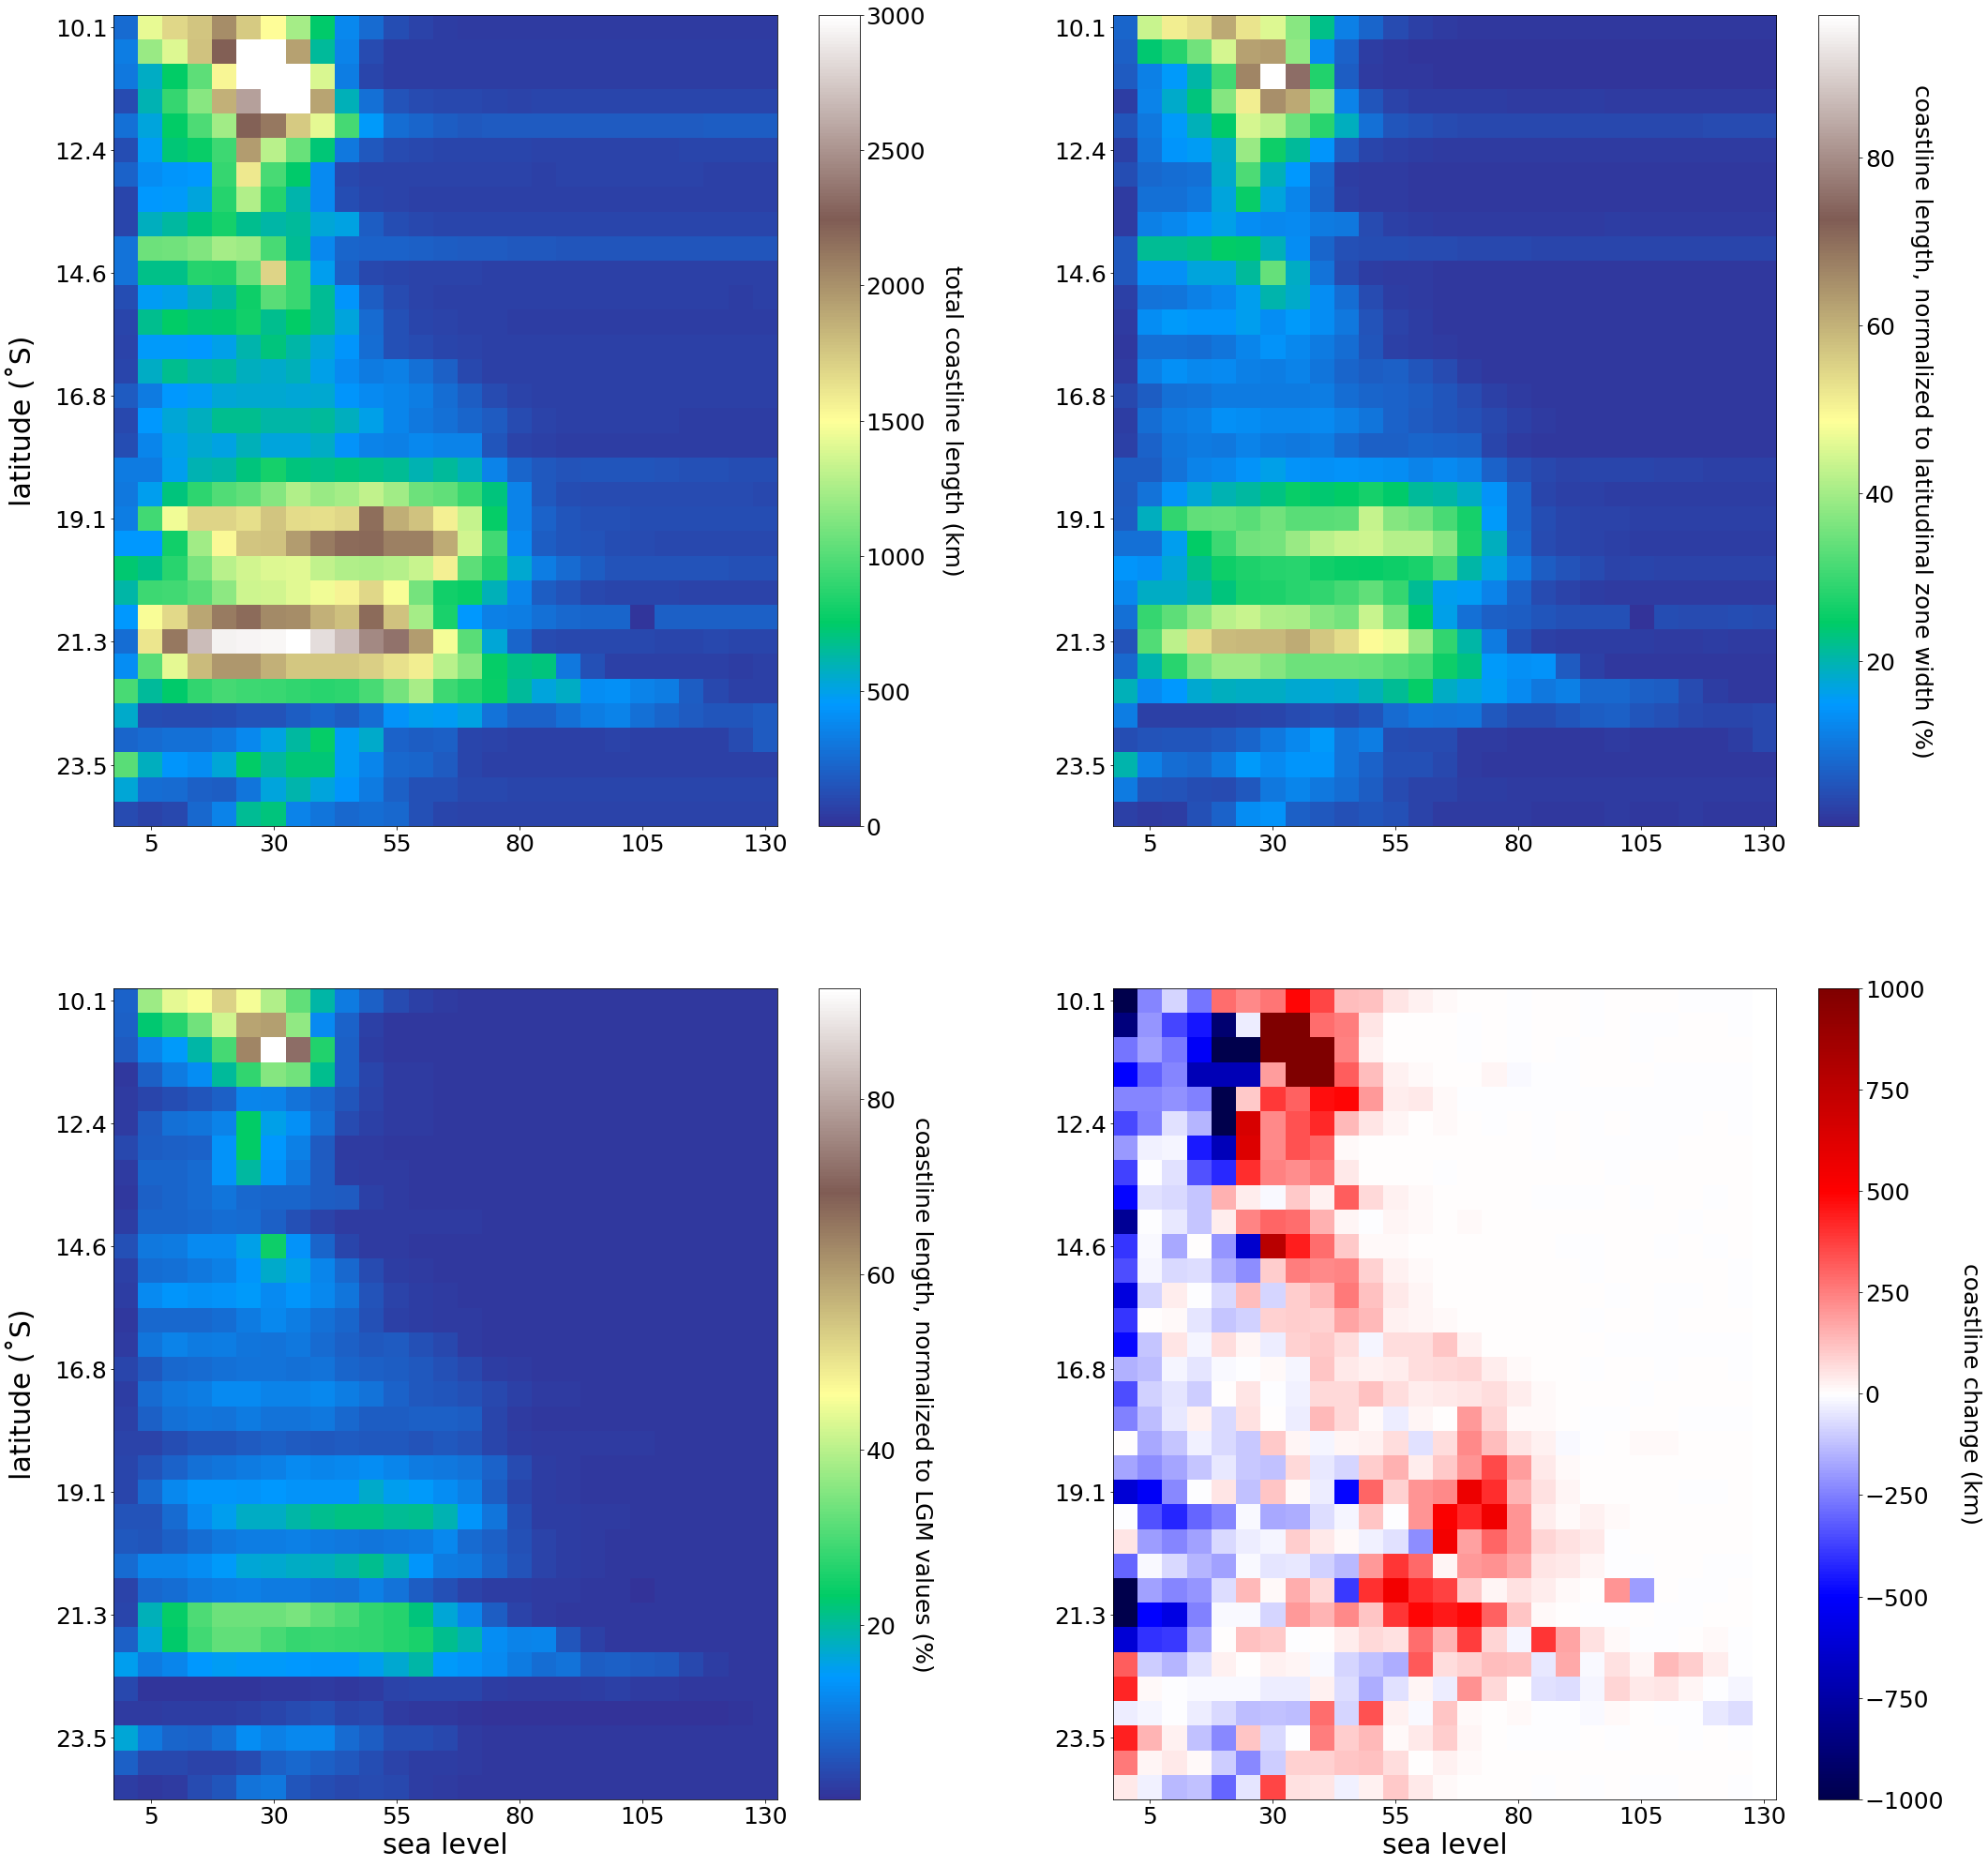

In [509]:
plt.figure(figsize=(35,35))

plt.subplot(221)
ax1=plt.imshow(np.rot90(coastline_length_summary,1), cmap='terrain', interpolation=None, vmin=0, vmax=3000)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='total coastline length (km)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25)
plt.ylabel('latitude (˚S)', fontsize=30, labelpad=20)
plt.xticks([0, 5, 10, 15, 20, 25])
ax1.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=25)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax1.axes.set_yticklabels(latitudes_round[:], fontsize=25)


plt.subplot(222)
ax2=plt.imshow(np.rot90(coastline_length_normWidth_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='coastline length, normalized to latitudinal zone width (%)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25)
plt.xticks([0, 5, 10, 15, 20, 25])
ax2.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=25)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax2.axes.set_yticklabels(latitudes_round[:], fontsize=25)


plt.subplot(223)
ax3=plt.imshow(np.rot90(coastline_length_normLGM_summary,1), cmap='terrain', interpolation=None)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='coastline length, normalized to LGM values (%)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25) 
plt.ylabel('latitude (˚S)', fontsize=30, labelpad=20)
plt.xlabel('sea level', fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 25])
ax3.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=25)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax3.axes.set_yticklabels(latitudes_round[:], fontsize=25)


plt.subplot(224)
ax4=plt.imshow(np.rot90(coastline_change_summary,1), cmap='seismic', interpolation=None, vmin=-1000, vmax=1000)
plt.gca().invert_xaxis()
plt.grid(False)
cb = plt.colorbar()
cb.set_label(label='coastline change (km)', fontsize=25, rotation=-90, labelpad=40)
cb.ax.tick_params(labelsize=25) 
plt.xlabel('sea level', fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 25])
ax4.axes.set_xticklabels(['130','105','80', '55', '30', '5'], fontsize=25)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
ax4.axes.set_yticklabels(latitudes_round[:], fontsize=25)

plt.savefig('./figures_review/fig5_review.svg')
plt.show()
